In [1]:
# Packages

import numpy as np
import matplotlib.pyplot as plt
import random

from utils import *
from environment import ButtonsToy
from learner import Learner, bayesian_update, compute_policy, projection
from teacher import NaiveTeacher, cost
from bayesian_ToM.bayesian_teacher import BaysesianTeacher

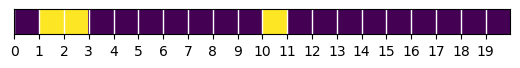

In [2]:
n_buttons = 20
n_music = 3

observation_env = ButtonsToy(n_buttons, n_music)
observation_env.render()

## Learners

In [ ]:
types = [0, 1, 2, 3]
traj_size = 150
N = 100
N_envs = 5
dict_learner  = {}
for type in types:
    learner = Learner(type)
    dict_learner[type] = {'actions' : [],
                  'rewards' : []}
    for _ in range(N_envs):
        observation_env = ButtonsToy(n_buttons, n_music)
        for _ in range(N):
            learner.init_env(observation_env)
            actions, rewards = learner.act(traj_size)
            dict_learner[type]['actions'].append(actions)
            dict_learner[type]['rewards'].append(rewards)

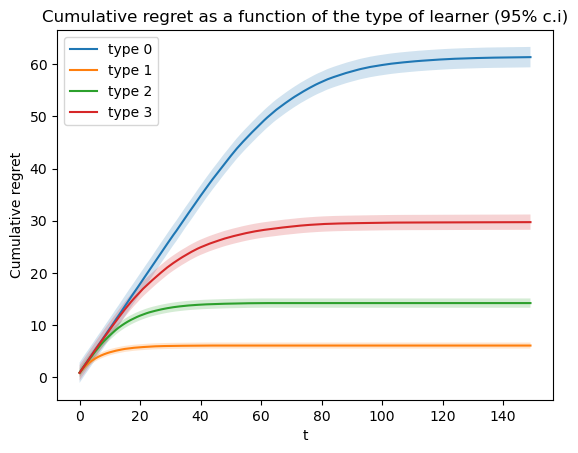

In [ ]:
for ii,type in enumerate(types):
    all_rewards = np.array(dict_learner[type]['rewards'])
    all_cum_regrets = np.cumsum(np.ones_like(all_rewards) - all_rewards, axis=1)
    mean, std = np.mean(all_cum_regrets, axis=0), np.std(all_cum_regrets)

    plt.plot(mean, label=f'type {type}')
    plt.fill_between(np.arange(traj_size), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std / np.sqrt(N * N_envs), alpha=0.2)
    plt.ylabel('Cumulative regret')
    plt.xlabel('t')
    plt.title('Cumulative regret as a function of the type of learner (95% c.i)')
    plt.legend()

## Bayesian based ToM teacher

Observation environment


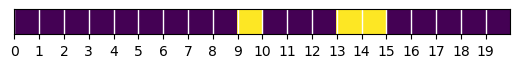

Demonstration environment


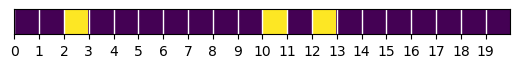

In [4]:
observation_env = ButtonsToy(n_buttons, n_music)
print('Observation environment')
observation_env.render()
plt.show()

demonstration_env = ButtonsToy(n_buttons, n_music)
print('Demonstration environment')
demonstration_env.render()
plt.show()

num_types = 4
teacher = BaysesianTeacher(env=observation_env, num_types=num_types)
learner = Learner(type=3)
learner.init_env(observation_env)

### Predict learner type (Maximum A Posteriori)

In [ ]:
N = 200
N_envs = 10
num_obs = 100

dict = {}

for type in range(num_types):
    dict[type] = []
    for _ in range(N_envs):
        # Init envs
        observation_env = ButtonsToy(n_buttons, n_music)
        demonstration_env = ButtonsToy(n_buttons, n_music)
        for _ in range(N):
            # Init teacher
            teacher = BaysesianTeacher(env=observation_env,
                                    num_types=num_types)
            # Init learner
            learner = Learner(type)
            learner.init_env(observation_env)

            accuracies = []
            for _ in range(num_obs):
                accuracies.append(type == teacher.predict_learner_type())
                traj = learner.act()
                teacher.observe(traj)
            dict[type].append(accuracies)

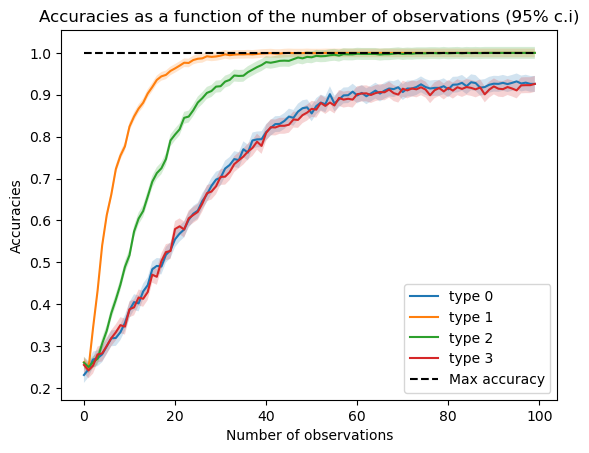

In [9]:
for type in range(num_types):
    accuracies = np.array(dict[type])
    mean, std = np.mean(accuracies, axis=0), np.std(accuracies)

    plt.plot(mean, label=f'type {type}')
    plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std / np.sqrt(N * N_envs), alpha=0.2)
    plt.ylabel('Accuracies')
    plt.xlabel('Number of observations')
    plt.title('Accuracies as a function of the number of observations (95% c.i)')
plt.plot(np.arange(num_obs), [1] * num_obs, c='k', label="Max accuracy", ls='--')
plt.legend();

In [ ]:
## Failure mode studies

N = 100
N_envs = 1
num_obs = 300

LOG = True

dict = {}

for type in range(num_types):
    dict[type] = {}
    dict[type]['accuracies'] = []
    dict[type]['beliefs'] = []
    for _ in range(N_envs):
        # Init envs
        observation_env = ButtonsToy(n_buttons, n_music)
        demonstration_env = ButtonsToy(n_buttons, n_music)
        for _ in range(N):
            # Init teacher
            teacher = BaysesianTeacher(env=observation_env,
                                    num_types=num_types)
            # Init learner
            learner = Learner(type)
            learner.init_env(observation_env)

            accuracies = []
            all_beliefs = []
            tag_traj = []
            for _ in range(num_obs):
                all_beliefs.append(teacher.beliefs.copy())
                accuracies.append(type == teacher.predict_learner_type())
                traj = learner.act()
                teacher.observe(traj)
                tag_traj.append(traj)

            # If prediction failure after 300 observations
            if LOG and type != teacher.predict_learner_type():
                # print LOG
                print(f'LOG FAILURE : type {type} beliefs {teacher.beliefs} trajectory {tag_traj}')

            dict[type]['beliefs'].append(all_beliefs)
            dict[type]['accuracies'].append(accuracies)

LOG FAILURE : type 0 beliefs [0.49798818 0.00201182 0.00201182 0.49798818] trajectory [([1], [0.0]), ([8], [0.0]), ([3], [0.0]), ([16], [0.0]), ([18], [0.0]), ([11], [0.0]), ([9], [0.0]), ([16], [0.0]), ([16], [0.0]), ([2], [0.0]), ([11], [0.0]), ([2], [0.0]), ([1], [0.0]), ([16], [0.0]), ([10], [0.0]), ([8], [0.0]), ([5], [0.0]), ([10], [0.0]), ([0], [1.0]), ([19], [0.0]), ([11], [0.0]), ([5], [0.0]), ([18], [0.0]), ([14], [0.0]), ([19], [0.0]), ([19], [0.0]), ([13], [0.0]), ([8], [0.0]), ([17], [0.0]), ([17], [0.0]), ([18], [0.0]), ([9], [0.0]), ([14], [0.0]), ([5], [0.0]), ([9], [0.0]), ([15], [0.0]), ([15], [0.0]), ([2], [0.0]), ([3], [0.0]), ([18], [0.0]), ([10], [0.0]), ([5], [0.0]), ([13], [0.0]), ([15], [0.0]), ([12], [0.0]), ([7], [0.0]), ([13], [0.0]), ([19], [0.0]), ([13], [0.0]), ([10], [0.0]), ([11], [0.0]), ([4], [1.0]), ([1], [0.0]), ([7], [0.0]), ([3], [0.0]), ([2], [0.0]), ([12], [0.0]), ([5], [0.0]), ([10], [0.0]), ([19], [0.0]), ([8], [0.0]), ([2], [0.0]), ([10], [0.

### Demonstrate

Observation environment


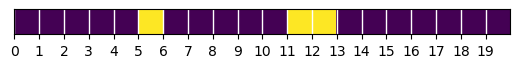

Demonstration environment


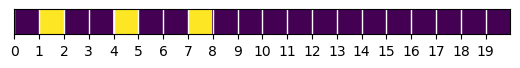

In [5]:
observation_env = ButtonsToy(n_buttons, n_music)
print('Observation environment')
observation_env.render()
plt.show()

demonstration_env = ButtonsToy(n_buttons, n_music)
print('Demonstration environment')
demonstration_env.render()
plt.show()

num_types = 4
num_demo_types = 4
teacher = BaysesianTeacher(env=observation_env, num_types=num_types)
learner = Learner(type=2)
learner.init_env(observation_env)

In [6]:
# Global evaluation parameters
# DICT = {}
# LOADED = False
DICT = load_output('./outputs/bayesian_ToM/teacher_eval.json')
LOADED = True

N = 100
N_envs = 3
num_obs = 50

n_eval = 20

#### Experiments and display

In [41]:
def evaluate(method: str, alpha: float) -> None:
    if method not in DICT.keys():
        DICT[method] = {}
    DICT[method][alpha] = {}
    for type in range(num_types):
        DICT[method][alpha][type] = {}
        DICT[method][alpha][type]['rewards'] = []
        DICT[method][alpha][type]['demo'] = []
        DICT[method][alpha][type]['uncertainty'] = []
        DICT[method][alpha][type]['teacher_regret'] = []
        for _ in range(N_envs):
            # Init envs
            observation_env = ButtonsToy(n_buttons, n_music)
            demonstration_env = ButtonsToy(n_buttons, n_music)
            for _ in range(N):
                cum_rewards = []
                all_demo = []
                uncertainties = []
                teacher_regret = []
                for n in range(num_obs):
                    # Init teacher
                    if method == 'MAP' or method == 'Bayesian':
                        teacher = BaysesianTeacher(env=observation_env,
                                                    num_types=num_types)
                    elif method == 'Uniform' or method == 'Opt_non_adaptive':
                        teacher = NaiveTeacher(env=observation_env,
                                                    num_types=num_types)
                    # Init learner
                    learner = Learner(type)
                    learner.init_env(observation_env)
                    if method == 'MAP' or method == 'Bayesian':
                        # Observe the learner
                        traj = learner.act(size=n)
                        teacher.observe(traj)
                        # Teacher uncertainty
                        uncertainties.append(Shannon_entropy(teacher.beliefs))
                    # Chose demonstration
                    teacher.init_env(demonstration_env)
                    demo = teacher.demonstrate(method=method, alpha=alpha)
                    # Teacher regret on its demonstration choice
                    teacher_regret.append(cost(demo, alpha=alpha) - cost(teacher.demonstrations[type], alpha=alpha))
                    # Show the demonstration
                    learner.init_env(demonstration_env)
                    learner.observe(demo)
                    # Evaluate hwo helpful has been the demonstration
                    _, rewards = learner.act(size=n_eval)
                    # Append
                    cum_rewards.append(np.sum(rewards))
                    all_demo.append(len(demo[0]))
                DICT[method][alpha][type]['rewards'].append(cum_rewards)
                DICT[method][alpha][type]['demo'].append(all_demo)
                DICT[method][alpha][type]['uncertainty'].append(uncertainties)
                DICT[method][alpha][type]['teacher_regret'].append(teacher_regret)

In [42]:
def display_evaluation(method: str, alpha: float, save: bool=True) -> None:
    demo_colors = ['m', 'red', 'orange', 'pink']

    if LOADED:
        alpha = str(alpha)

    fig0 = plt.figure(figsize=(15,5))
    # Mean over the type of learner of the total reward on trajectory of size 20  (after seen the demo chosen by the teacher)
    all_evals = np.array([DICT[method][alpha][str(type)]['rewards'] if LOADED else DICT[method][alpha][type]['rewards'] for type in range(num_types)]).mean(axis=0)
    mean = np.mean(all_evals, axis=0)
    std = np.std(all_evals)

    plt.plot(mean, label=f'{method}', color='saddlebrown')
    plt.ylim(0, 21)
    plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color='saddlebrown')
    plt.plot(np.arange(num_obs), [20] * num_obs, c='k', label="Max", ls='--')
    
    # Baseline MAP --> Uniform
    if method == 'MAP':
        baseline = 'Uniform'
        if baseline in DICT.keys():
            all_evals = np.array([DICT[baseline][alpha][str(type)]['rewards'] if LOADED else DICT[baseline][alpha][type]['rewards'] for type in range(num_types)]).mean(axis=0)
            mean = np.mean(all_evals, axis=0)
            std = np.std(all_evals)
            plt.plot(mean, label=f'Baseline ({baseline})', color='crimson', ls='--')
            plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color='crimson')

    plt.title(fr' Mean total reward over all the type of learner'  + f'\n $\mathbf{{{method}}}$ teacher, cost parameter alpha={alpha}')
    plt.xlabel('Number of observations')
    plt.ylabel('Learner reward')
    plt.legend()

    fig1 = plt.figure(figsize=(15,5))
    # Learner total reward on trajectory of size 20 (after seen the demo chosen by the teacher for each type of learner)
    fig1.add_subplot(1,2,1)
    for type in range(num_types):
        if LOADED:
            type = str(type)
        all_evals = np.array(DICT[method][alpha][type]['rewards'])
        mean = np.mean(all_evals, axis=0)
        std = np.std(all_evals)

        plt.plot(mean, label=f'type = {type}')
        plt.ylim(0, 21)
        plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std / np.sqrt(N * N_envs), alpha=0.2)
    plt.plot(np.arange(num_obs), [20] * num_obs, c='k', label="Max", ls='--')
    plt.title(fr'Learner total reward per type'  + f'\n $\mathbf{{{method}}}$ teacher, cost parameter alpha={alpha}')

    plt.xlabel('Number of observations')
    plt.ylabel('Learner reward')
    plt.legend()

    # Teacher uncertainty
    if method == 'MAP' or method == 'Bayesian':
        fig1.add_subplot(1,2,2)
        for type in range(num_types):
            if LOADED:
                type = str(type)
            all_evals = np.array(DICT[method][alpha][type]['uncertainty'])
            mean = np.mean(all_evals, axis=0)
            std = np.std(all_evals)

            plt.plot(mean, label=f'type = {type}')
            plt.ylim(- 0.5 , Shannon_entropy(np.ones(num_types) / num_types) + 0.5)
            plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2)
        plt.plot(np.arange(num_obs), [0] * num_obs, c='k', label="Min", ls='--')
        plt.title(fr'Teacher uncertainty per type' + f'\n $\mathbf{{{method}}}$ teacher, cost parameter alpha={alpha}')

        plt.xlabel('Number of observations')
        plt.ylabel('Teacher uncertainty (Shannon entropy)')
        plt.legend()

    # Repartition btw type of demonstrations shown
    fig2, axes = plt.subplots(1, 4, figsize=(25,5))
    for type in range(num_types):
        ax = axes[type]
        if LOADED:
            type = str(type)
        for demo_type in range(num_demo_types):
            demo_rep = np.array(DICT[method][alpha][type]['demo'])
            if demo_type == 0:
                prop_demo = np.array(demo_rep == n_buttons)
            else:
                prop_demo = np.array(demo_rep == demo_type)
            mean = np.mean(prop_demo, axis=0)
            std = np.std(prop_demo)

            ax.plot(mean, label=f'demo type = {demo_type}', color=demo_colors[demo_type])
            ax.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N + N_envs), mean - 1.96 * std/np.sqrt(N + N_envs), alpha=0.2, color=demo_colors[demo_type])
        ax.plot(np.arange(num_obs), [1] * num_obs, c='k', label="Max", ls='--')

        ax.set_title(f'% of each demo type for learner of $\mathbf{{type}}$' + f'\n {method} teacher, cost parameter alpha={alpha}')
        ax.set_xlabel('Number of observations')
        ax.set_ylabel('Proportion')
        ax.legend()

    # Teacher regret on the cost of the demonstration he showed
    fig3, axes = plt.subplots(1, 4, figsize=(25,5))
    for type in range(num_types):
        ax = axes[type]
        if LOADED:
            type = str(type)
        all_regrets = np.array(DICT[method][alpha][type]['teacher_regret'])
        mean = np.mean(all_regrets, axis=0)
        std = np.std(all_regrets)

        ax.plot(mean, label=f'type = {type}', color='c')
        ax.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color='c')
        ax.set_ylim( - (float(alpha) * (n_buttons - 1) + 0.02), float(alpha) * (n_buttons - 1) + 0.02)
        ax.plot(np.arange(num_obs), [0] * num_obs, c='k', ls='--')

        # Baseline
        if method == 'Bayesian':
            baseline = 'Opt_non_adaptive'
            all_regrets = np.array(DICT[baseline][alpha][type]['teacher_regret'])
            mean = np.mean(all_regrets, axis=0)
            std = np.std(all_regrets)

            ax.plot(mean, label=f'Baseline ({baseline})', color='crimson', ls='--')
            ax.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color='crimson')

        ax.set_title(f'Teacher cost regret for learner of $\mathbf{{type}}$ ' + fr'$\mathbf{{{type}}}$' +  f'\n {method} teacher, cost parameter alpha={alpha}')
        ax.set_xlabel('Number of observations')
        ax.set_ylabel('Cost regret')
        ax.legend()

    # Super figure
    figs = [fig0, fig1, fig2, fig3]
    saving_names = ['mean', 'per_type', 'chosen_demo', 'teacher_regret']
    if save:
        for ii, fig in enumerate(figs):
            fig.savefig(f'./bayesian_ToM/figures/{method}/eval_{saving_names[ii]}_{method}_{alpha}.png')

In [41]:
def display_utility(alpha: float=0.01) -> None:
    _ = plt.figure(figsize=(15,5))
    method_values = ['MAP', 'Bayesian', 'Uniform', 'Opt_non_adaptive']
    colors = ['orangered', 'mediumvioletred', 'darkturquoise', 'royalblue']
    for ii,method in enumerate(method_values):
        util = []
        for type in range(num_types):
            best_cost = alpha * n_buttons if type == 0 else alpha * type
            all_rewards = np.array([DICT[method][str(alpha)][str(type)]['rewards'] if LOADED else DICT[method][alpha][type]['rewards'] for type in range(num_types)]).mean(axis=0)
            all_cost = np.array([DICT[method][str(alpha)][str(type)]['teacher_regret'] + best_cost if LOADED else DICT[method][alpha][type]['rewards'] + best_cost for type in range(num_types)]).mean(axis=0)

            all_util = all_rewards / n_buttons - all_cost
            util.append(all_util)
            
        all = np.mean(util, axis=0)
        mean = np.mean(all, axis=0)
        std = np.std(all)

        plt.plot(mean, label=f'{method}', color=colors[ii])
        plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color=colors[ii])
    
    plt.xlabel('Number of observations')
    plt.ylabel('Utility')
    plt.legend()
    plt.title(f'Mean utility over all the type of learner (95% c.i) \n cost parameter alpha={alpha}')


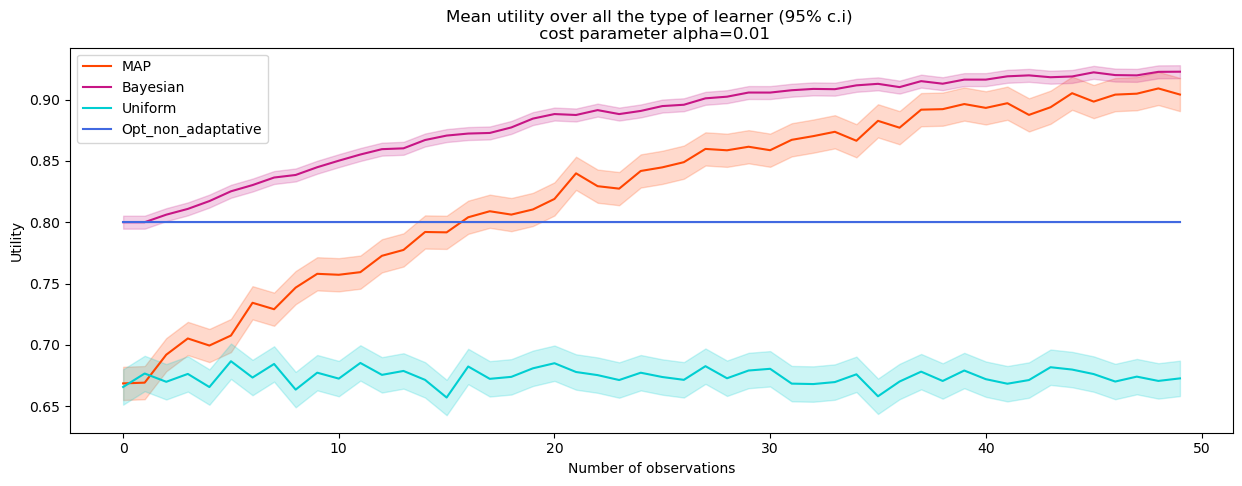

In [42]:
display_utility()

#### MAP teacher

In [17]:
method = 'MAP'
alpha_values = [0.01, 0.02]

for alpha in alpha_values:
    evaluate(method, alpha)

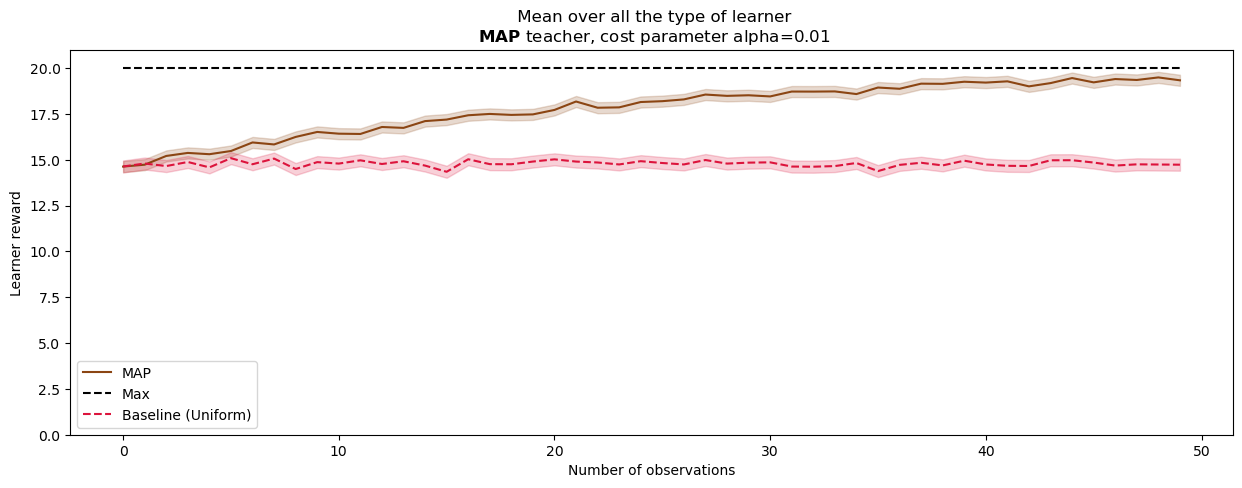

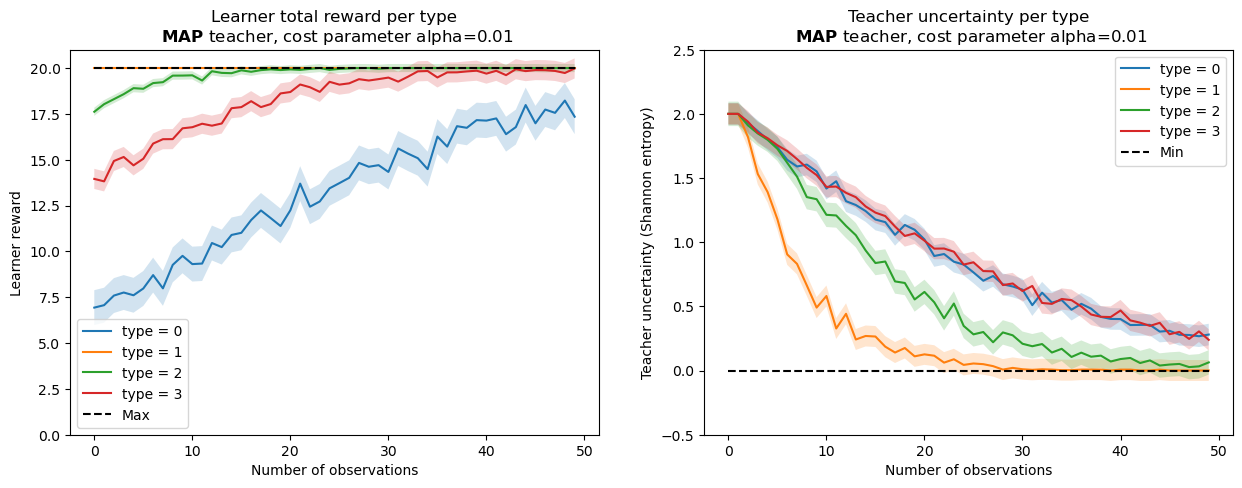

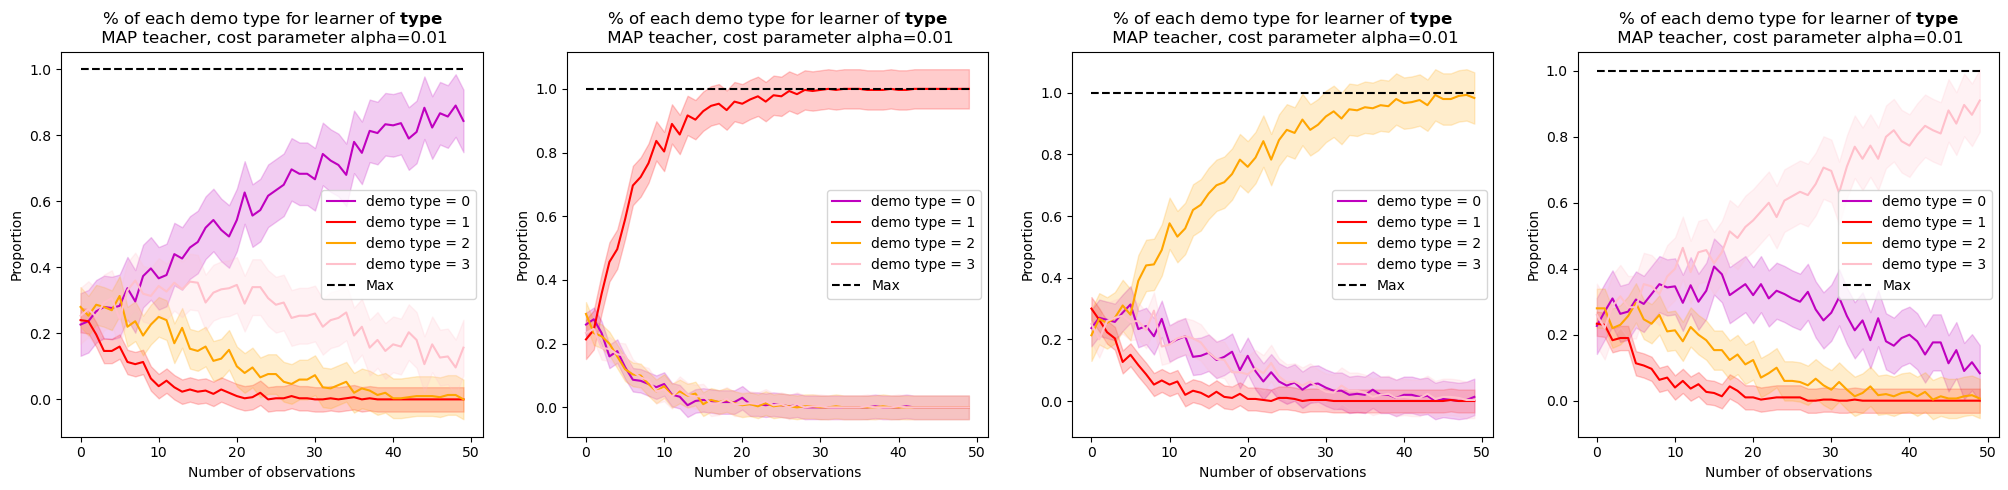

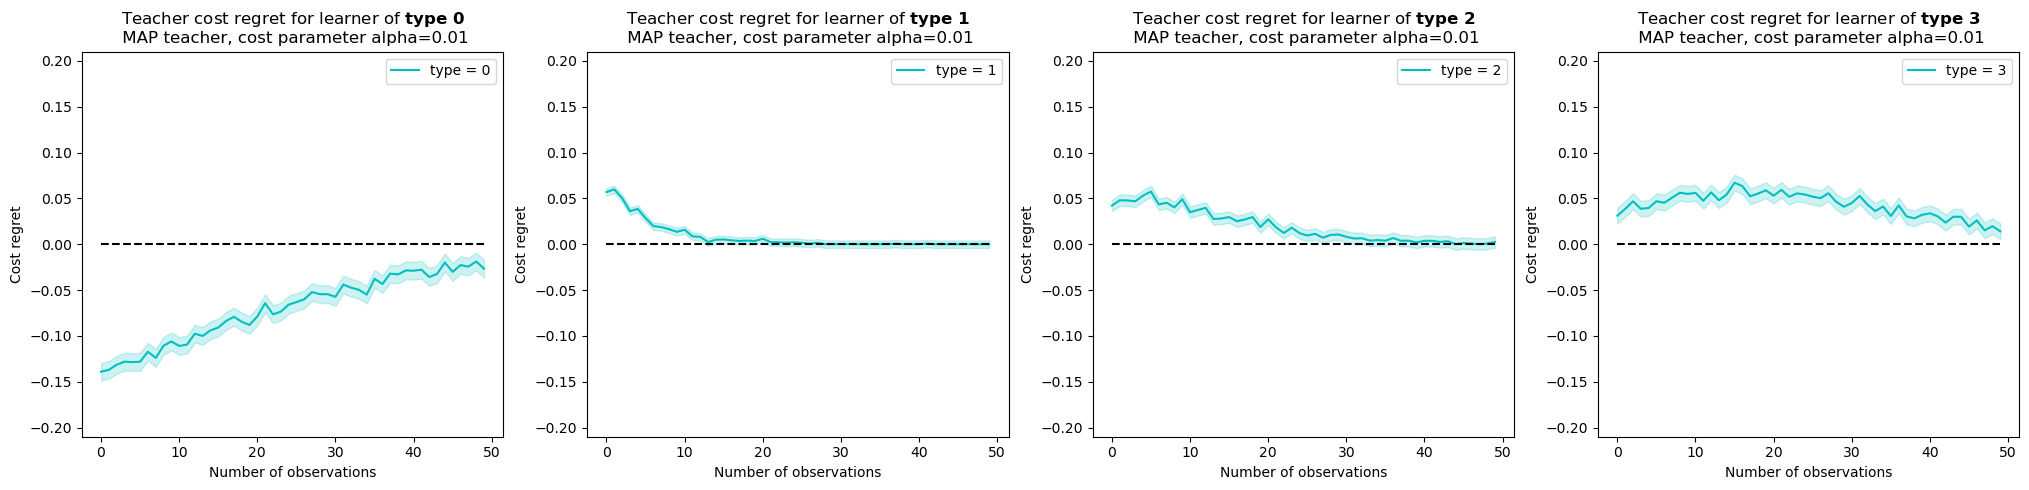

In [43]:
method, alpha = 'MAP', alpha_values[0]
display_evaluation(method, alpha)

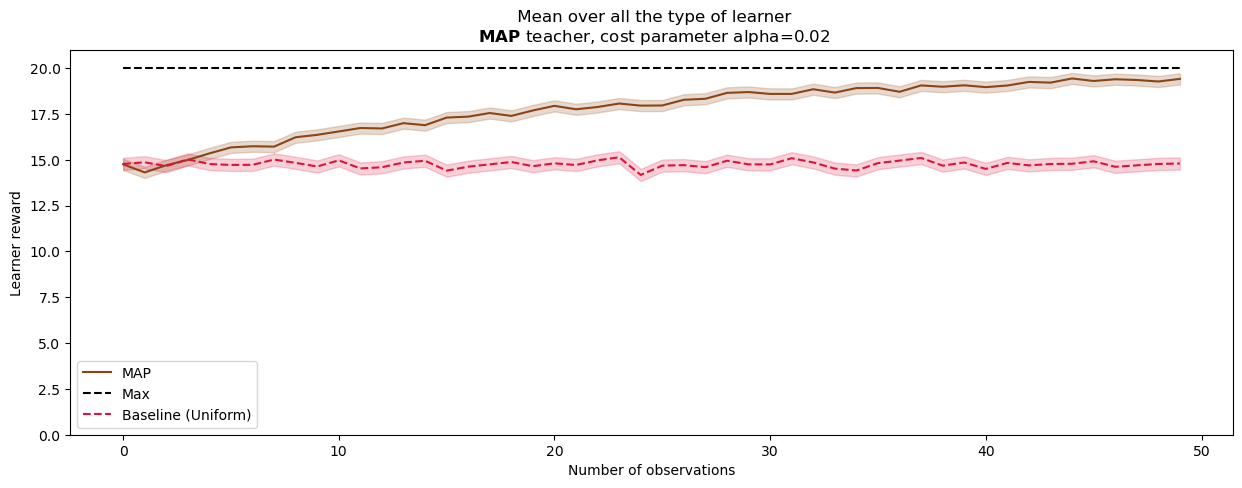

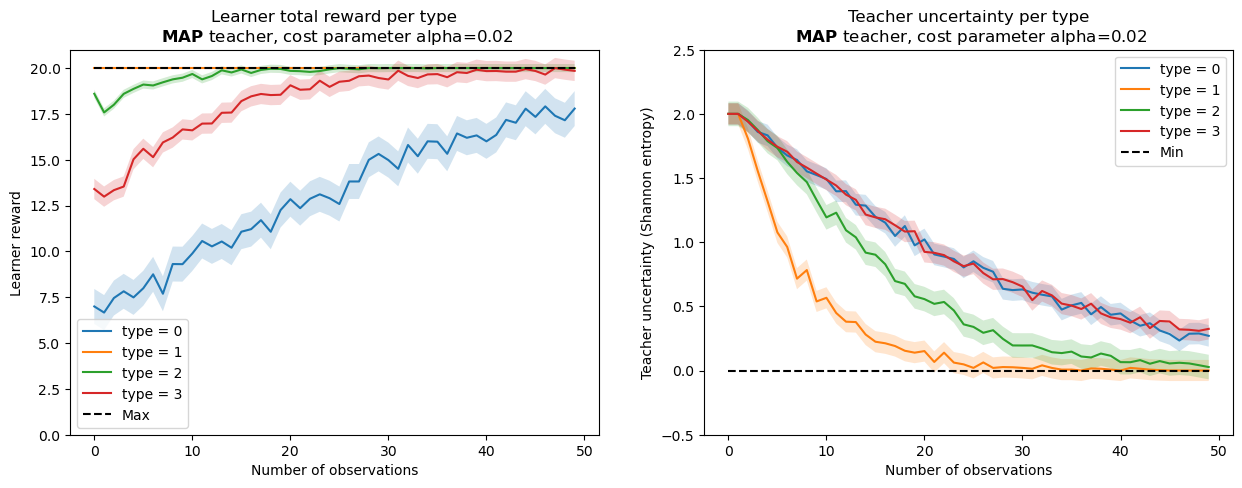

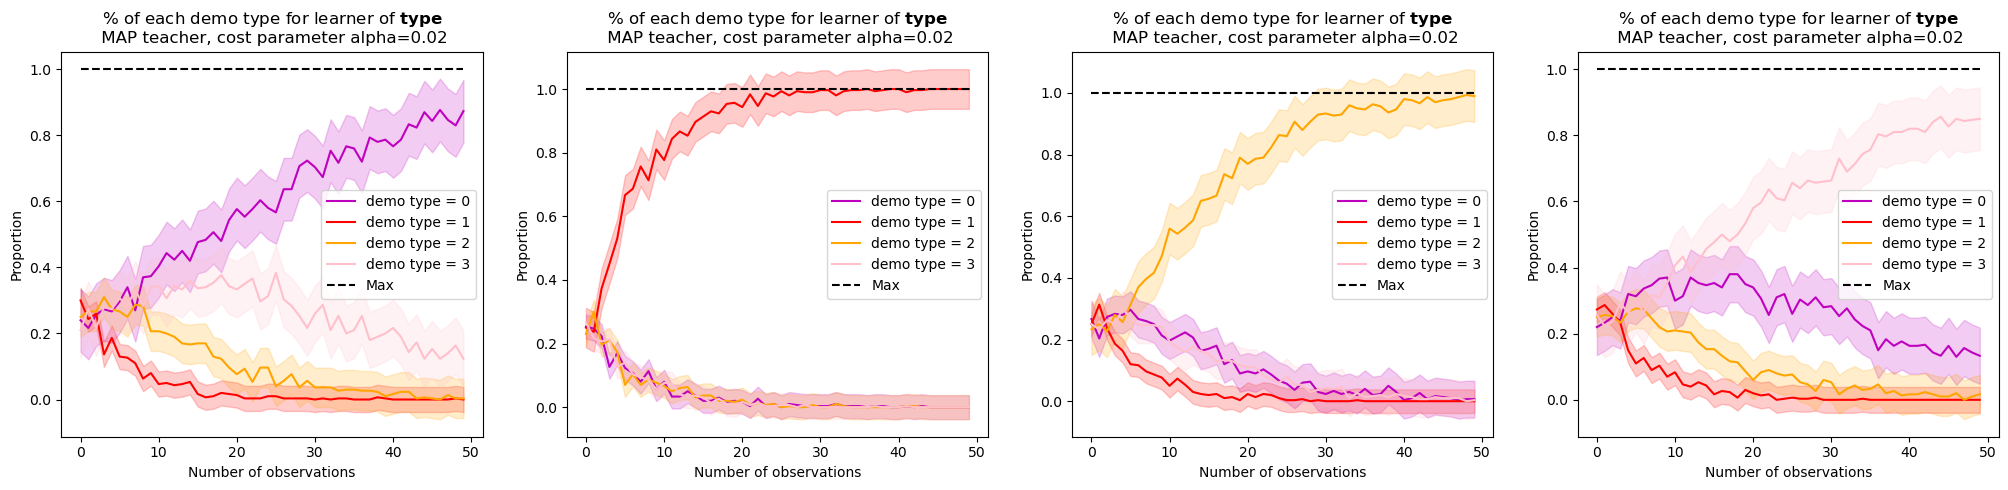

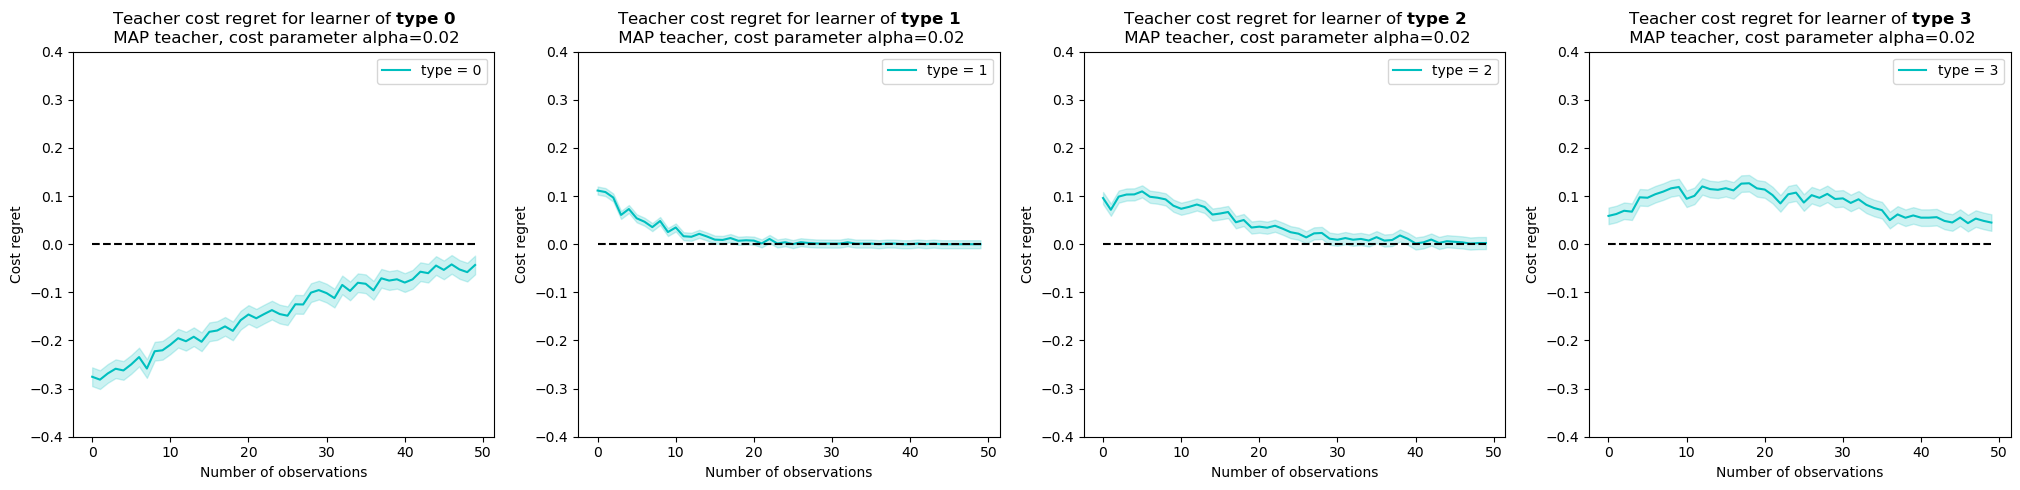

In [44]:
method, alpha = 'MAP', alpha_values[1]
display_evaluation(method, alpha)

#### Bayesian teacher

In [18]:
method = 'Bayesian'
alpha_values = [0.01, 0.02]

for alpha in alpha_values:
    evaluate(method, alpha)

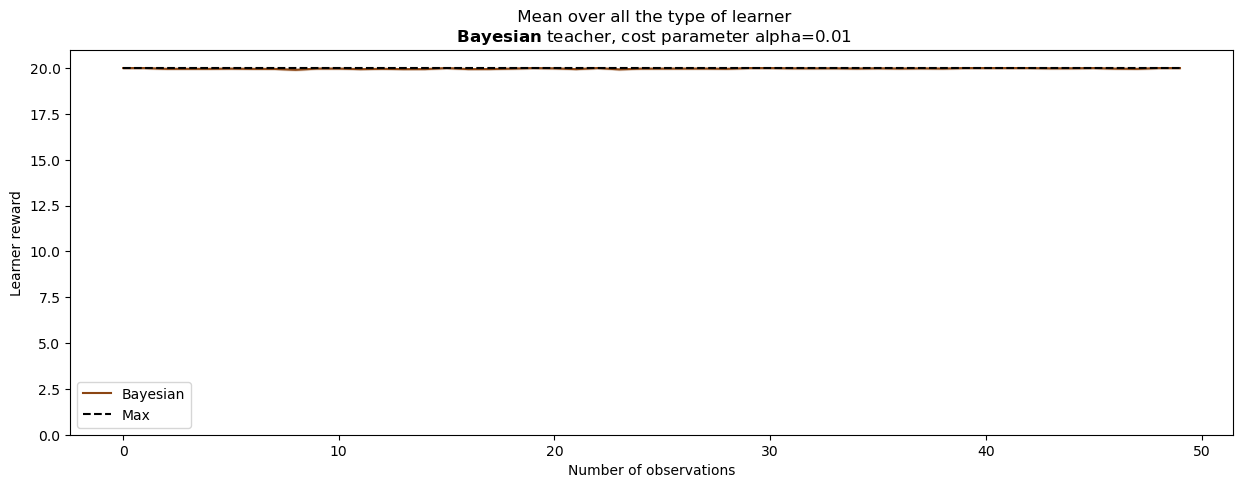

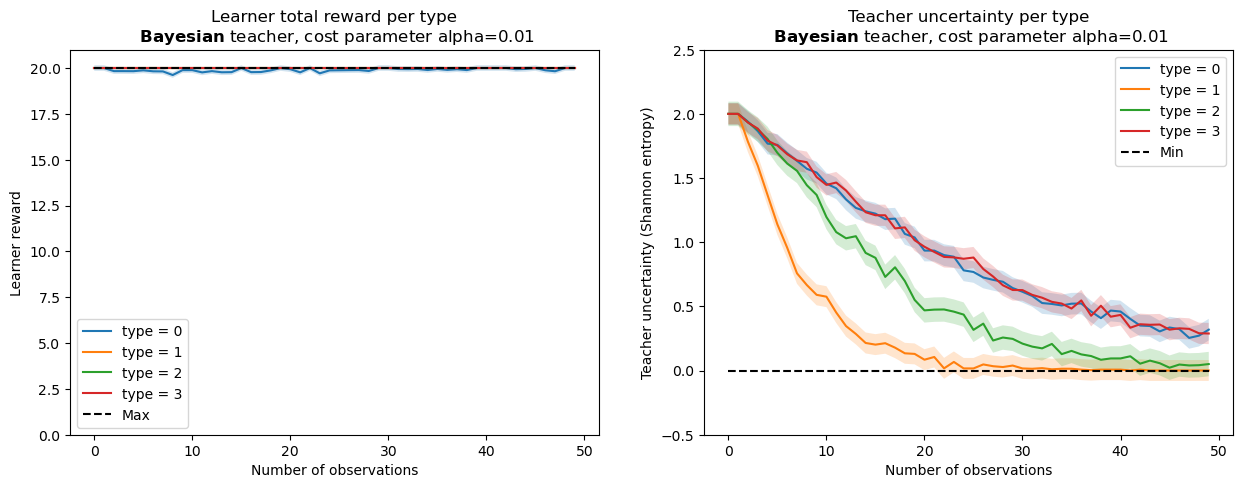

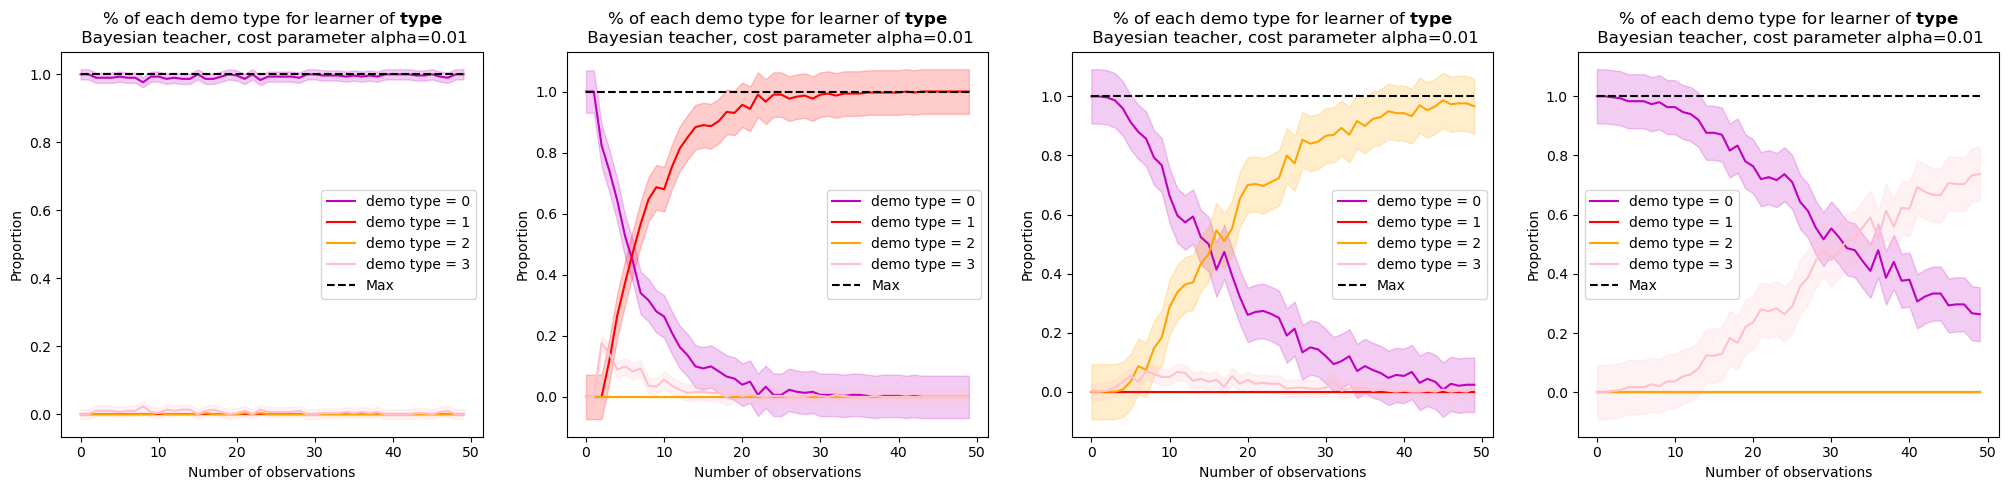

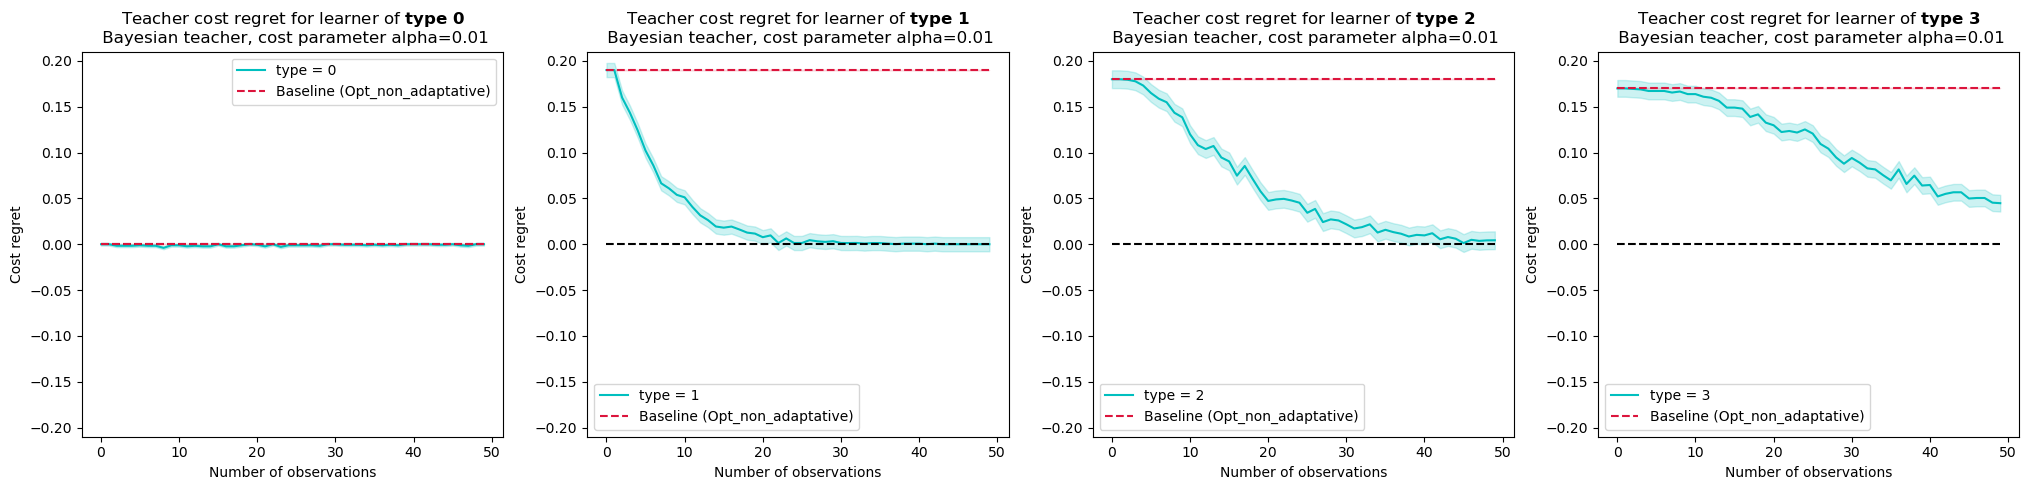

In [45]:
method, alpha = 'Bayesian', alpha_values[0]
display_evaluation(method, alpha)

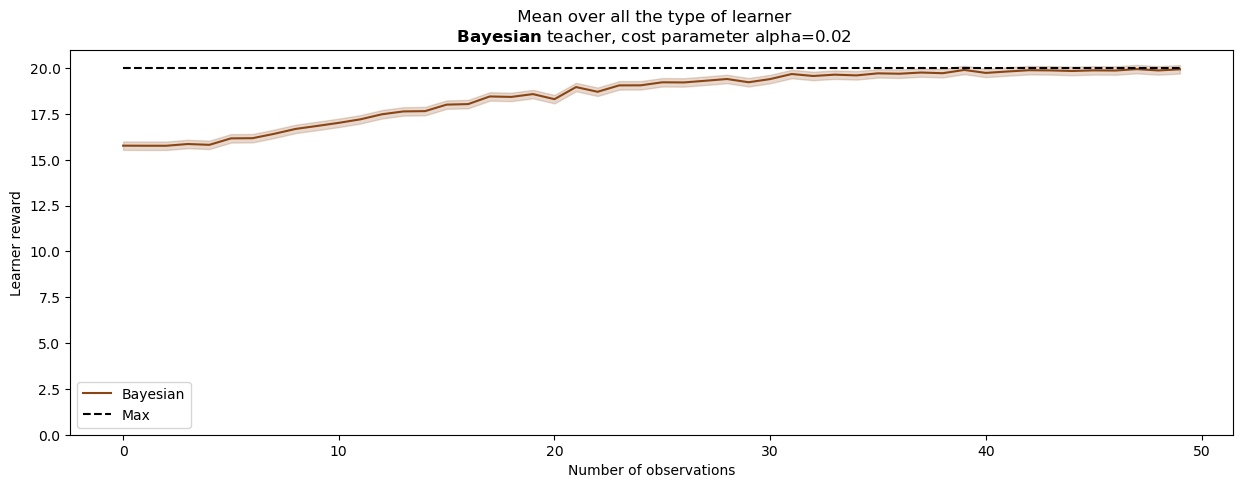

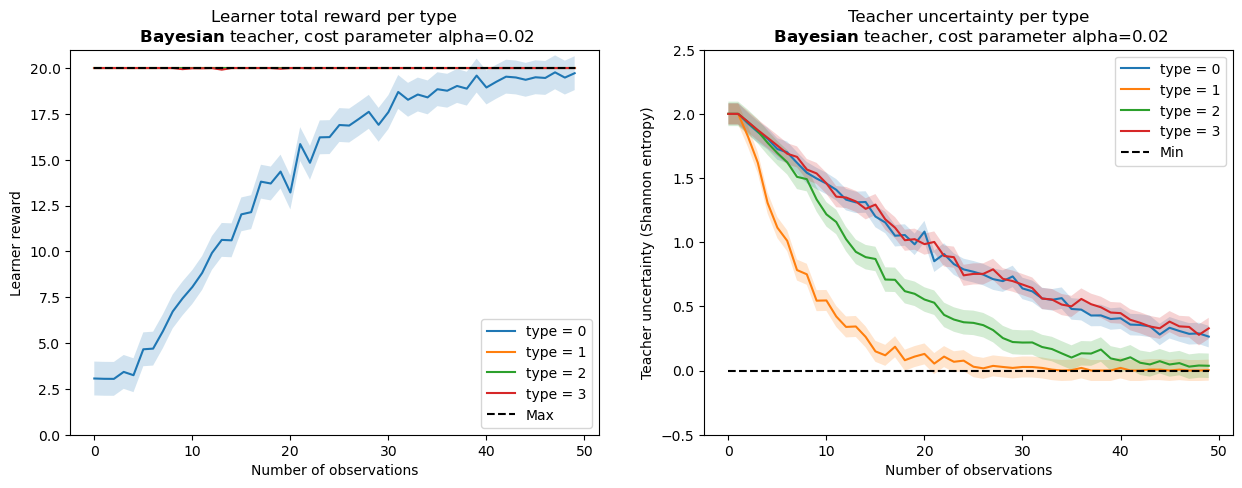

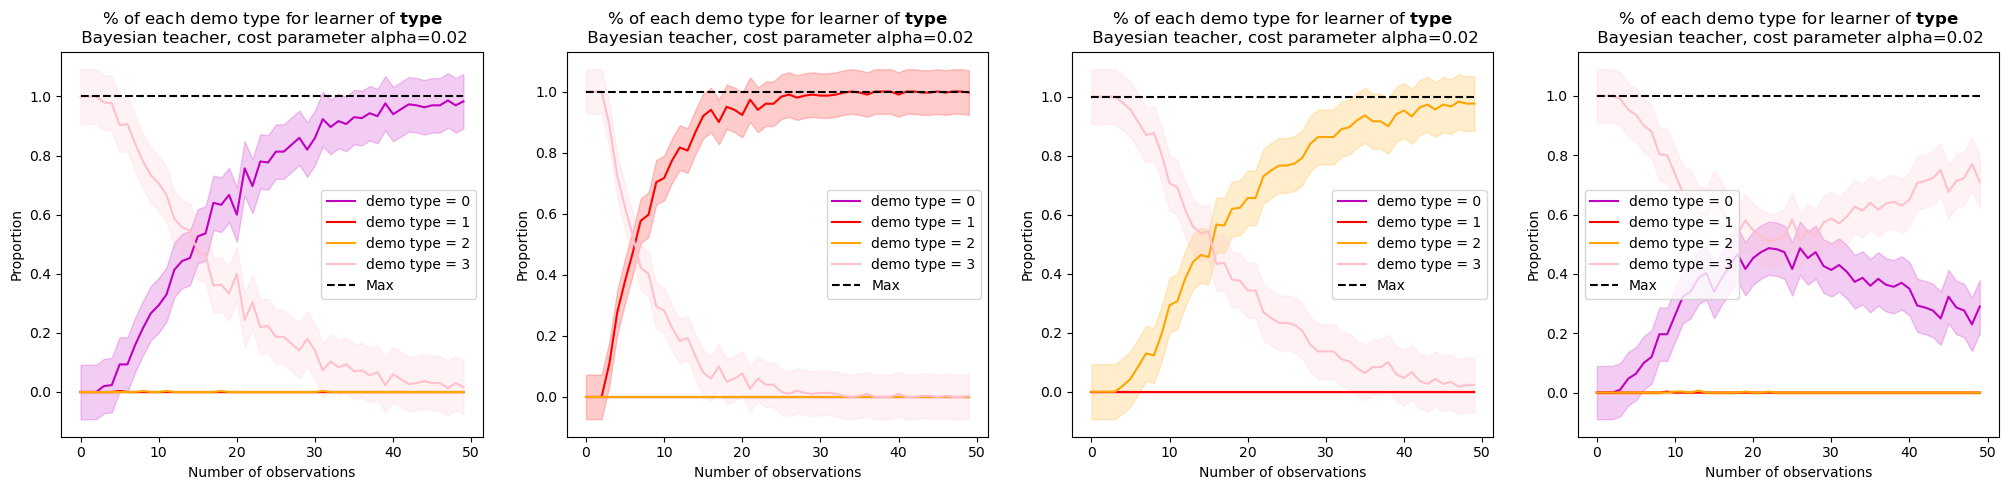

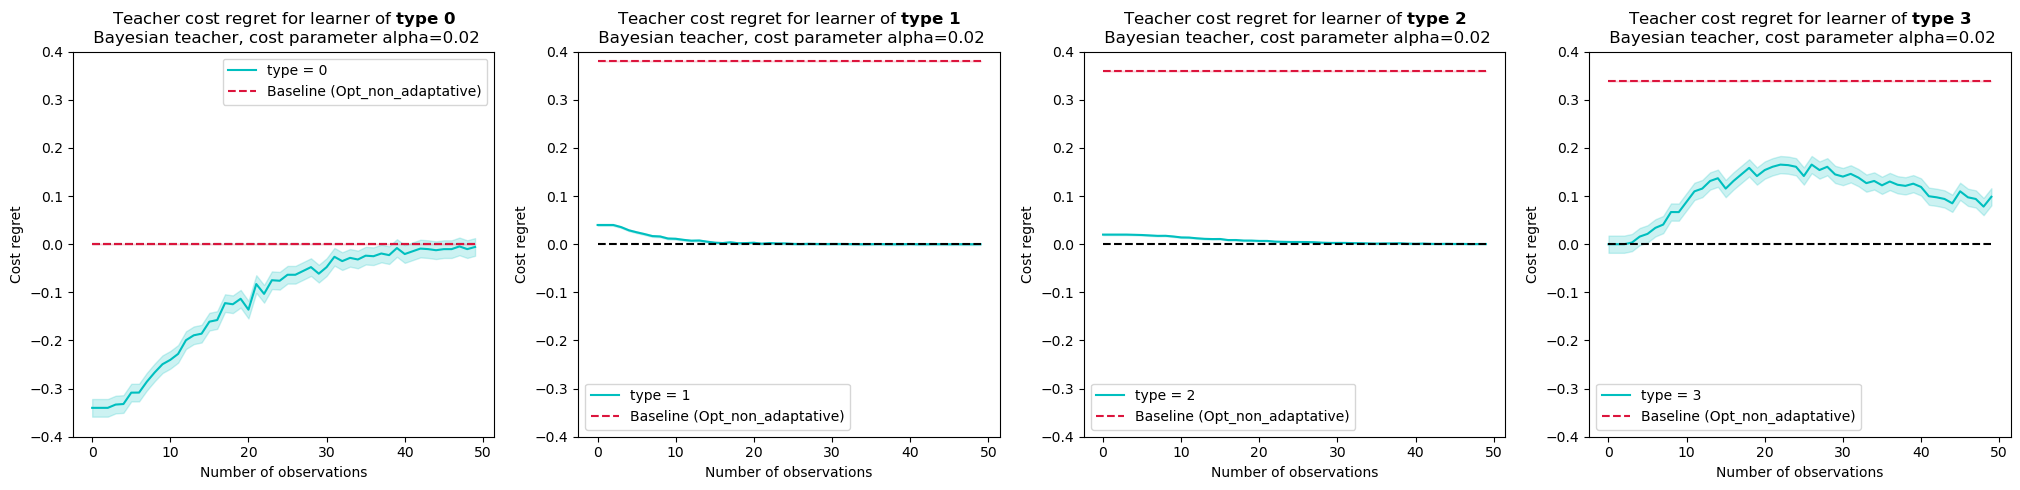

In [46]:
method, alpha = 'Bayesian', alpha_values[1]
display_evaluation(method, alpha)

#### Uniform teacher

In [19]:
method = 'Uniform'
alpha_values = [0.01, 0.02] # Only to compute teacher regret

for alpha in alpha_values:
    evaluate(method, alpha) 

#### Optimal non adaptive teacher

In [20]:
method = 'Opt_non_adaptive'
alpha_values = [0.01, 0.02] # Only to compute teacher regret

for alpha in alpha_values:
    evaluate(method, alpha) 

#### Saving

In [21]:
save_output(DICT, './outputs/bayesian_ToM', 'teacher_eval')

### Tracking changeable learner

In [4]:
# Global evaluation parameters
# DICT_tracking = {}
# LOADED = False
DICT_tracking = load_output('/home/chetouani/Documents/STAGE_Clemence/ISIR_internship_ToM/experimental_setup_meta/outputs/bayesian_ToM/teacher_eval_change_tracking.json')
LOADED = True

N = 100
N_envs = 3
num_obs = 60

n_eval = 20

num_types = 4
num_demo_types = num_types

#### Experiments and display

In [5]:
def evaluate_tracking(changing_step: int, method: str, init_type: int, final_type: int, alpha: float=0.01, save: bool=True) -> None:
    if method not in DICT_tracking.keys():
        DICT_tracking[method] = {}
    DICT_tracking[method][changing_step] = {}
    DICT_tracking[method][changing_step]['rewards'] = []
    DICT_tracking[method][changing_step]['demo'] = []
    DICT_tracking[method][changing_step]['uncertainty'] = []
    for _ in range(N_envs):
        # Init envs
        observation_env = ButtonsToy(n_buttons, n_music)
        demonstration_env = ButtonsToy(n_buttons, n_music)
        for _ in range(N):
            cum_rewards = []
            all_demo = []
            uncertainties = []
            for n in range(num_obs):
                # Init teacher
                if method == 'MAP' or method == 'Bayesian':
                    teacher = BaysesianTeacher(env=observation_env,
                                                num_types=num_types)
                elif method == 'Uniform' or method == 'Opt_non_adaptive':
                    teacher = NaiveTeacher(env=observation_env,
                                                num_types=num_types)
                # Init learner
                learner = Learner(init_type)
                learner.init_env(observation_env)
                if method == 'MAP' or method == 'Bayesian':
                    # Observe the learner
                    traj = learner.act(size = min(changing_step, n))
                    teacher.observe(traj)
                    if n > changing_step:
                        # Change learner type
                        learner.type = final_type
                        traj = learner.act(size = n - changing_step)
                        teacher.observe(traj)
                    # Teacher uncertainty
                    uncertainties.append(Shannon_entropy(teacher.beliefs))
                # Chose demonstration
                teacher.init_env(demonstration_env)
                demo = teacher.demonstrate(method=method, alpha=alpha)
                # Show the demonstration
                learner.init_env(demonstration_env)
                learner.observe(demo)
                # Evaluate hwo helpful has been the demonstration
                _, rewards = learner.act(size=n_eval)
                # Append 
                cum_rewards.append(np.sum(rewards))
                all_demo.append(len(demo[0]))
            DICT_tracking[method][changing_step]['rewards'].append(cum_rewards)
            DICT_tracking[method][changing_step]['demo'].append(all_demo)
            DICT_tracking[method][changing_step]['uncertainty'].append(uncertainties)

In [9]:
def display_tracking(method: str, init_type: int, final_type: int, alpha: float=0.01, save: bool=True) -> None:
    colors = ['indigo','orchid', 'hotpink', 'coral', 'red', 'brown']
    step_colors = ['indigo', 'purple', 'deeppink', 'orangered', 'darkred', 'saddlebrown']

    if method == 'MAP' or method == 'Bayesian':
        fig0, axes = plt.subplots(2, 1, figsize=(15,10))
    else:
        fig0, axes = plt.subplots(1, 1, figsize=(15,5))
        
    for ii, changing_step in enumerate(DICT_tracking[method].keys()):        
        if method == 'MAP' or method == 'Bayesian':
            ax = axes[0]
        else:
            ax = axes

        # Learner reward
        all_evals = DICT_tracking[method][changing_step]['rewards']
        mean = np.mean(all_evals, axis=0)
        std = np.std(all_evals)

        ax.plot(mean, label=f'changing step = {changing_step}', color=colors[ii])
        ax.set_ylim(0,21)
        ax.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color=colors[ii])
        ax.plot([int(changing_step)] * num_obs, np.linspace(0, 20, num_obs), ls='--', color=step_colors[ii])

        # Teacher uncertainty
        if method == 'MAP' or method == 'Bayesian':
            ax = axes[1]
            all_evals = DICT_tracking[method][changing_step]['uncertainty']
            mean = np.mean(all_evals, axis=0)
            std = np.std(all_evals)

            ax.plot(mean, label=f'changing step = {changing_step}', color=colors[ii])
            ax.set_ylim(- 0.5, Shannon_entropy(np.ones(num_types) / num_types) + 0.5)
            ax.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color=colors[ii])
            ax.plot([int(changing_step)] * num_obs, np.linspace(-0.5, 10, num_obs), ls='--', color=step_colors[ii])

    if method == 'MAP' or method == 'Bayesian':
        ax = axes[0]
    else:
        ax = axes
    # Learner total reward on trajectory of size 20 (after seen the teacher demonstration)
    ax.plot(np.arange(num_obs), [20] * num_obs, c='k', label="Max", ls='--')
    ax.set_xlabel('Number of observations')
    ax.set_ylabel('Learner reward')
    ax.legend()

    if method == 'MAP' or method == 'Bayesian':
        # Teacher uncertainty (Shannon entropy)
        axes[1].plot(np.arange(num_obs), [0] * num_obs, c='k', label="Min", ls='--')
        axes[1].set_xlabel('Number of observations')
        axes[1].set_ylabel('Teacher uncertainty')
        axes[1].legend()
    # Suptitle
    fig0.suptitle(fr' Demonstration chosen by $\mathbf{{{method}}}$ teacher ' + '\n' + \
        fr' Learner changing from type $\mathbf{{{init_type}}}$ to type $\mathbf{{{final_type}}}$')
    

    # Repartition btw type of demonstrations shown
    demo_colors = ['m', 'red', 'orange', 'pink']
    dict_length = len(DICT_tracking[method].keys())
    num_col = 3
    fig1, axes = plt.subplots(dict_length // num_col + 1 * (dict_length % num_col > 0), num_col, figsize=(20, 10))
    for ii, changing_step in enumerate(DICT_tracking[method].keys()):
        if dict_length > 1:
            ax = axes[ii // num_col, ii % num_col]
        else:
            ax = axes
        for demo_type in range(num_demo_types):
            demo_rep = np.array(DICT_tracking[method][changing_step]['demo'])
            if demo_type == 0:
                prop_demo = np.array(demo_rep == n_buttons)
            else:
                prop_demo = np.array(demo_rep == demo_type)
            mean = np.mean(prop_demo, axis=0)
            std = np.std(prop_demo)

            ax.plot(mean, label=f'demo type = {demo_type}', color=demo_colors[demo_type])
            ax.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N + N_envs), mean - 1.96 * std/np.sqrt(N + N_envs), alpha=0.2, color=demo_colors[demo_type])
            ax.plot([int(changing_step)] * num_obs, np.linspace(0, 1, num_obs), ls='--', color=step_colors[ii])
        ax.plot(np.arange(num_obs), [1] * num_obs, c='k', label="Max", ls='--')

        ax.set_title(f'Learner changing from type {init_type} to type {final_type} ' + \
                      fr'at $\mathbf{{step}}$ $\mathbf{{{changing_step}}}$')

        ax.set_xlabel('Number of observations')
        ax.set_ylabel('Proportion')
        ax.legend()

    # Super figure
    figs = [fig0, fig1]
    saving_names = ['per_step','chosen_demo']
    if save:
        for ii, fig in enumerate(figs):
            fig.savefig(f'./bayesian_ToM/figures/{method}/eval_with_changing_learner_from_{init_type}_to_{final_type}_{saving_names[ii]}_{method}_{alpha}.png')
    


#### MAP teacher

In [ ]:
changing_step_values = [0, 10, 20, 30, 40, 50]
for changin_step in changing_step_values:
    evaluate_tracking(changin_step, 'MAP', init_type=2, final_type=3)

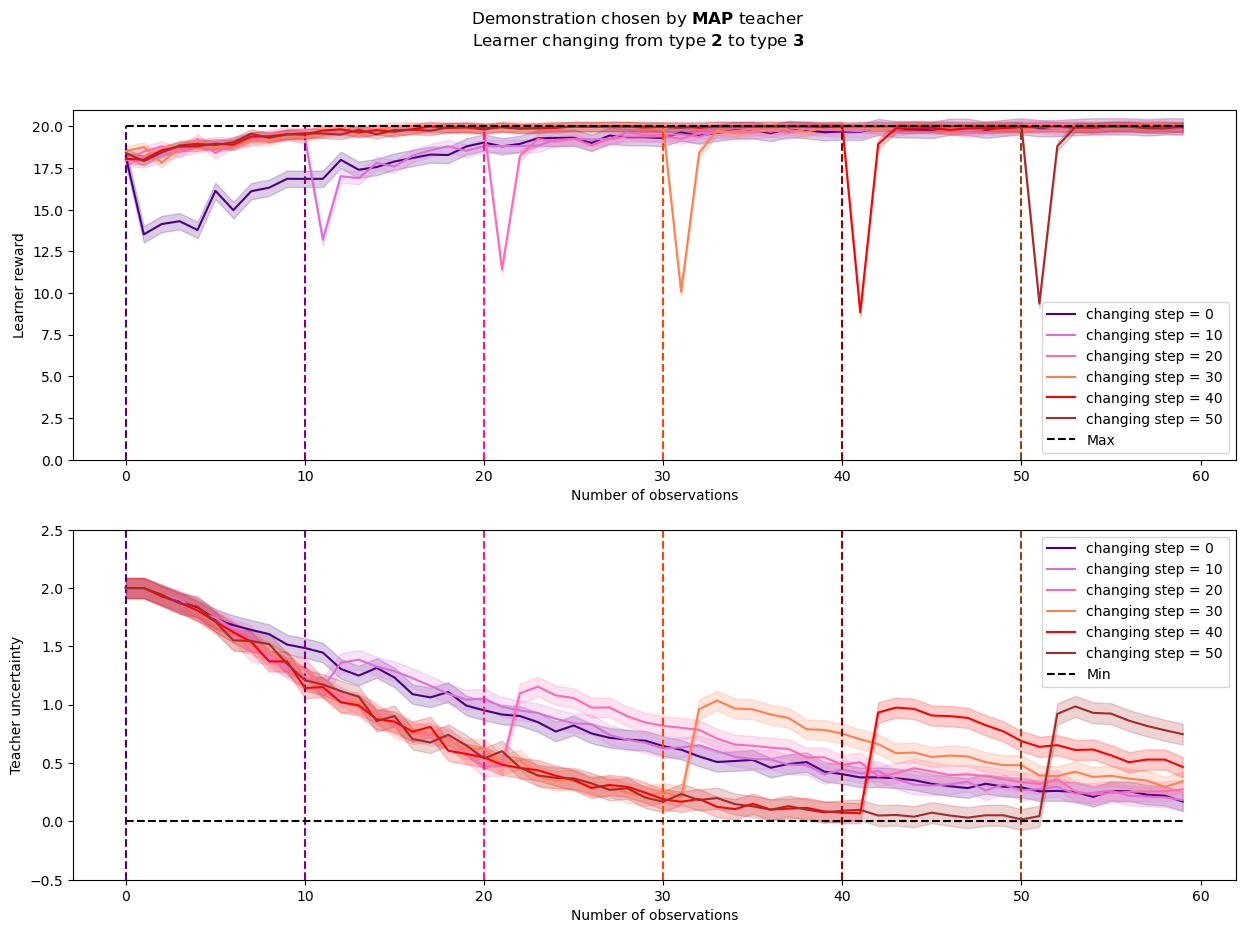

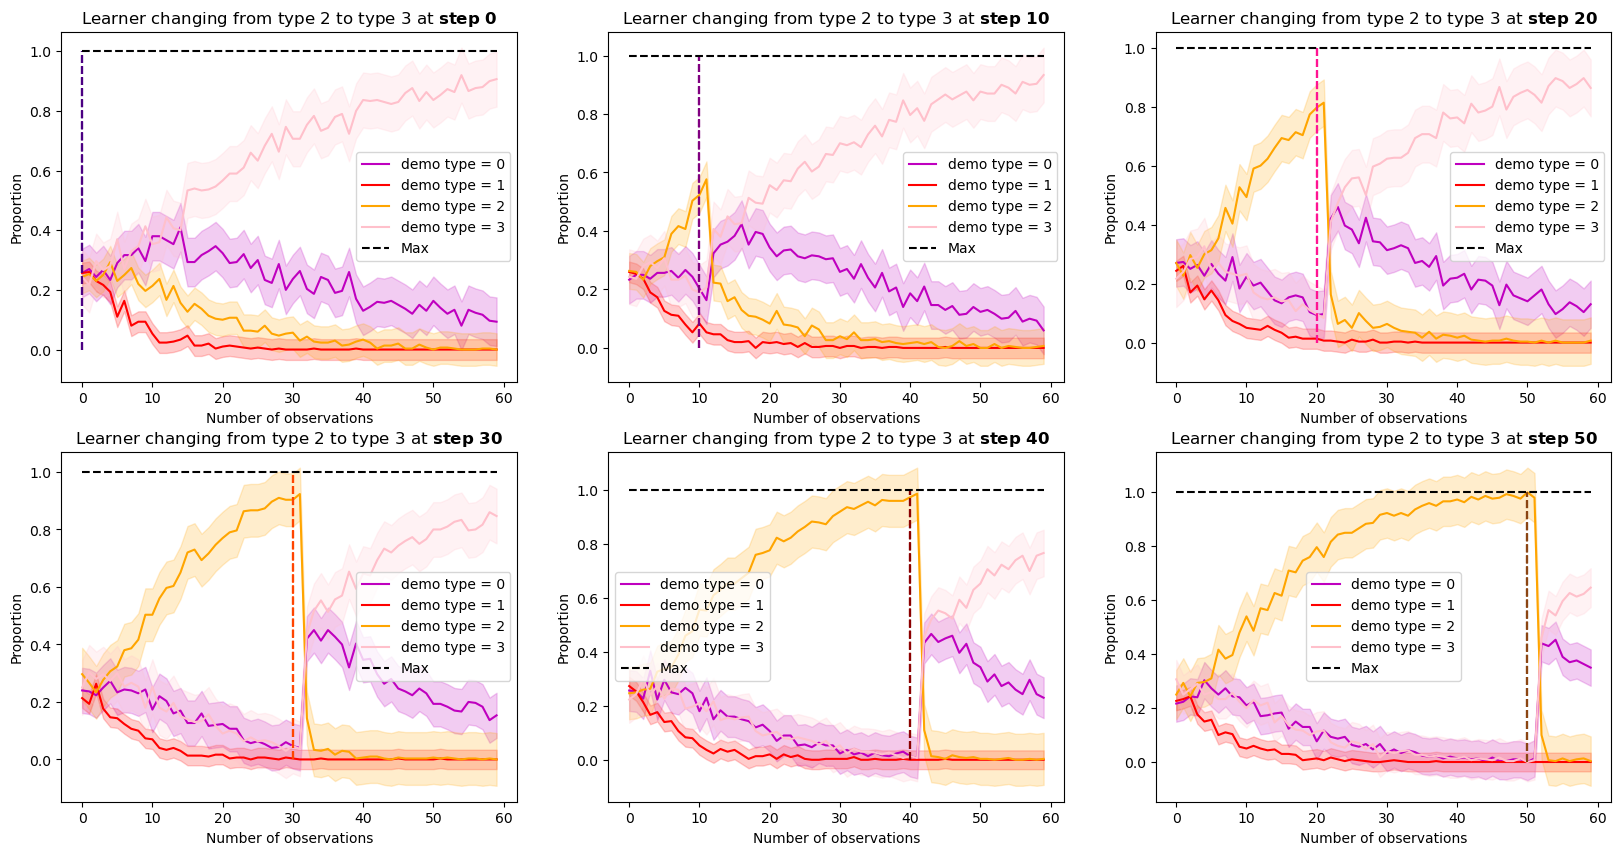

In [10]:
display_tracking('MAP', init_type=2, final_type=3)

#### Bayesian Teacher

In [31]:
changing_step_values = [0, 10, 20, 30, 40, 50]
for changin_step in changing_step_values:
    evaluate_tracking(changin_step, 'Bayesian', init_type=2, final_type=3)

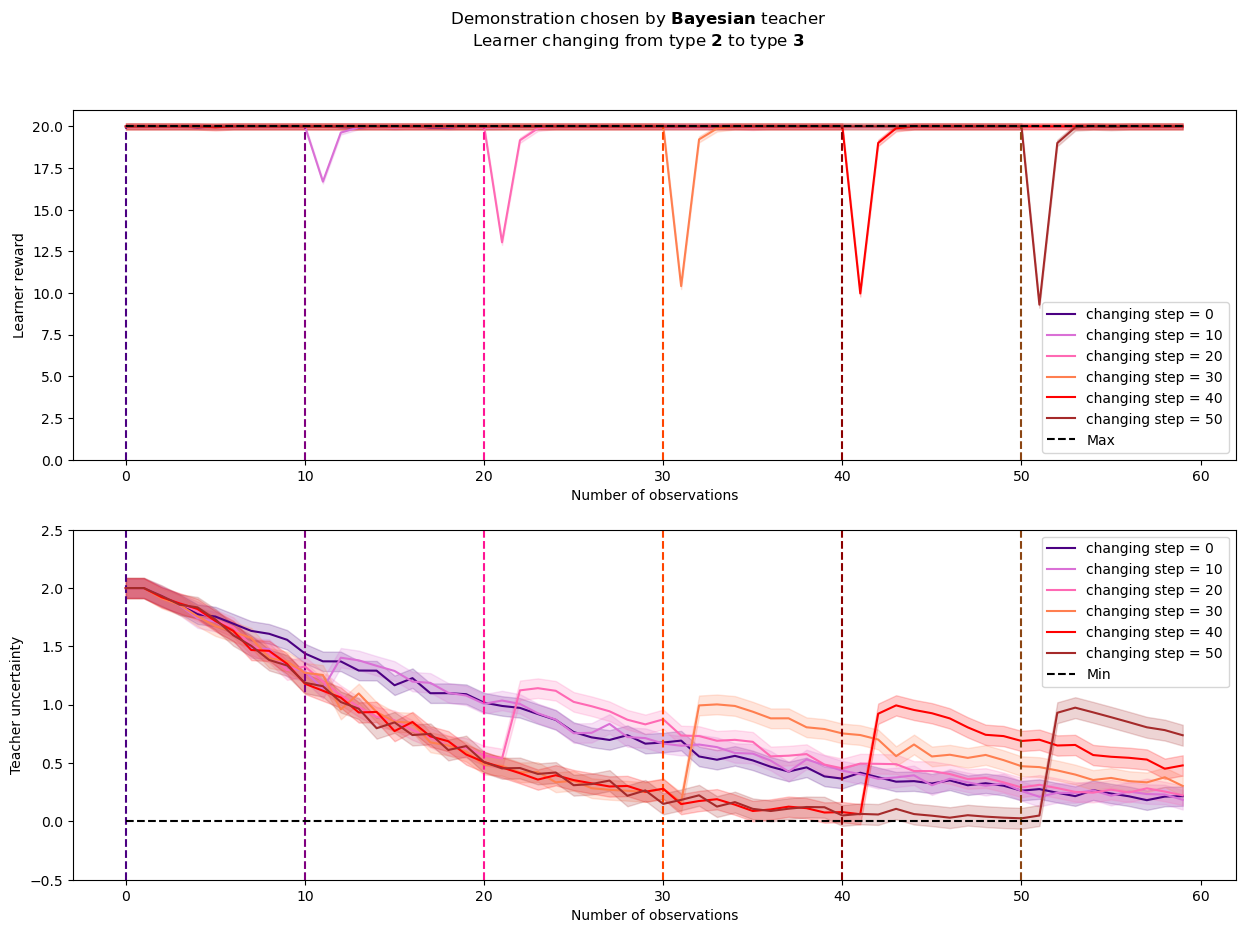

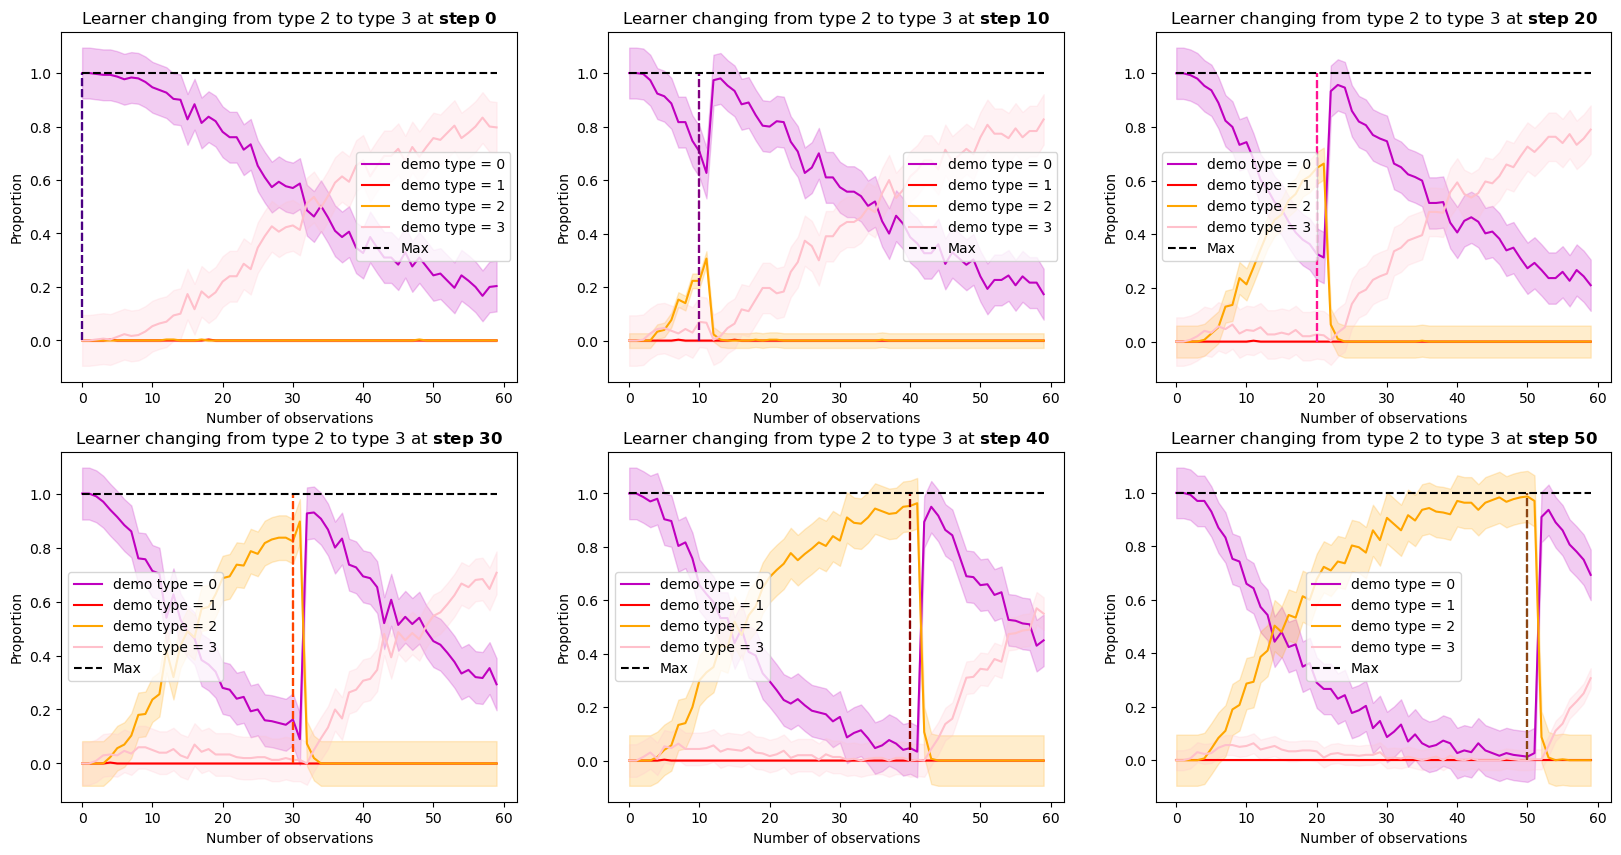

In [11]:
display_tracking('Bayesian', init_type=2, final_type=3)

#### Uniform teacher

In [33]:
changing_step_values = [0, 10, 20, 30, 40, 50]
for changin_step in changing_step_values:
    evaluate_tracking(changin_step, 'Uniform', init_type=2, final_type=3)

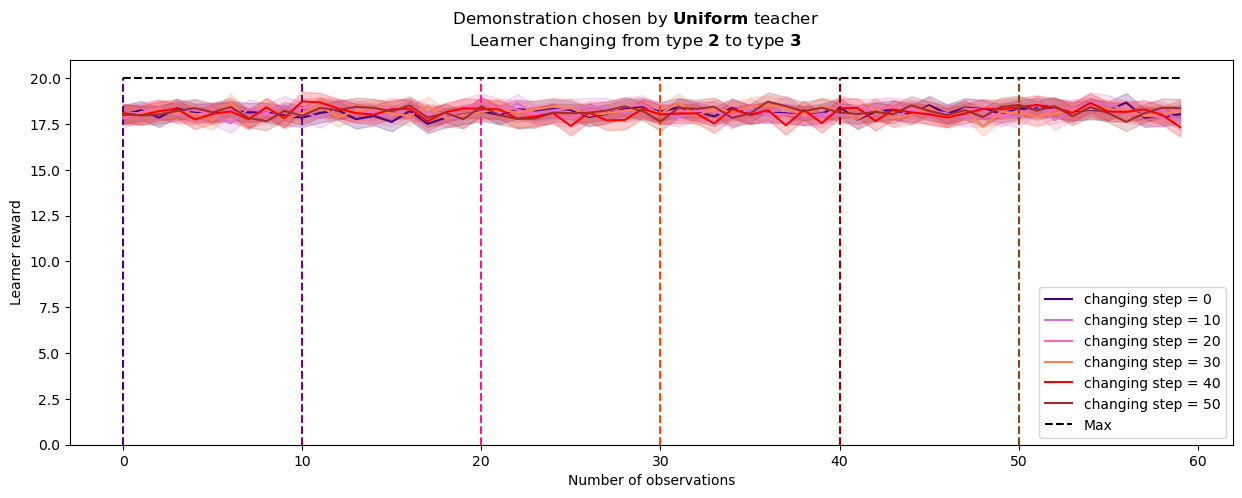

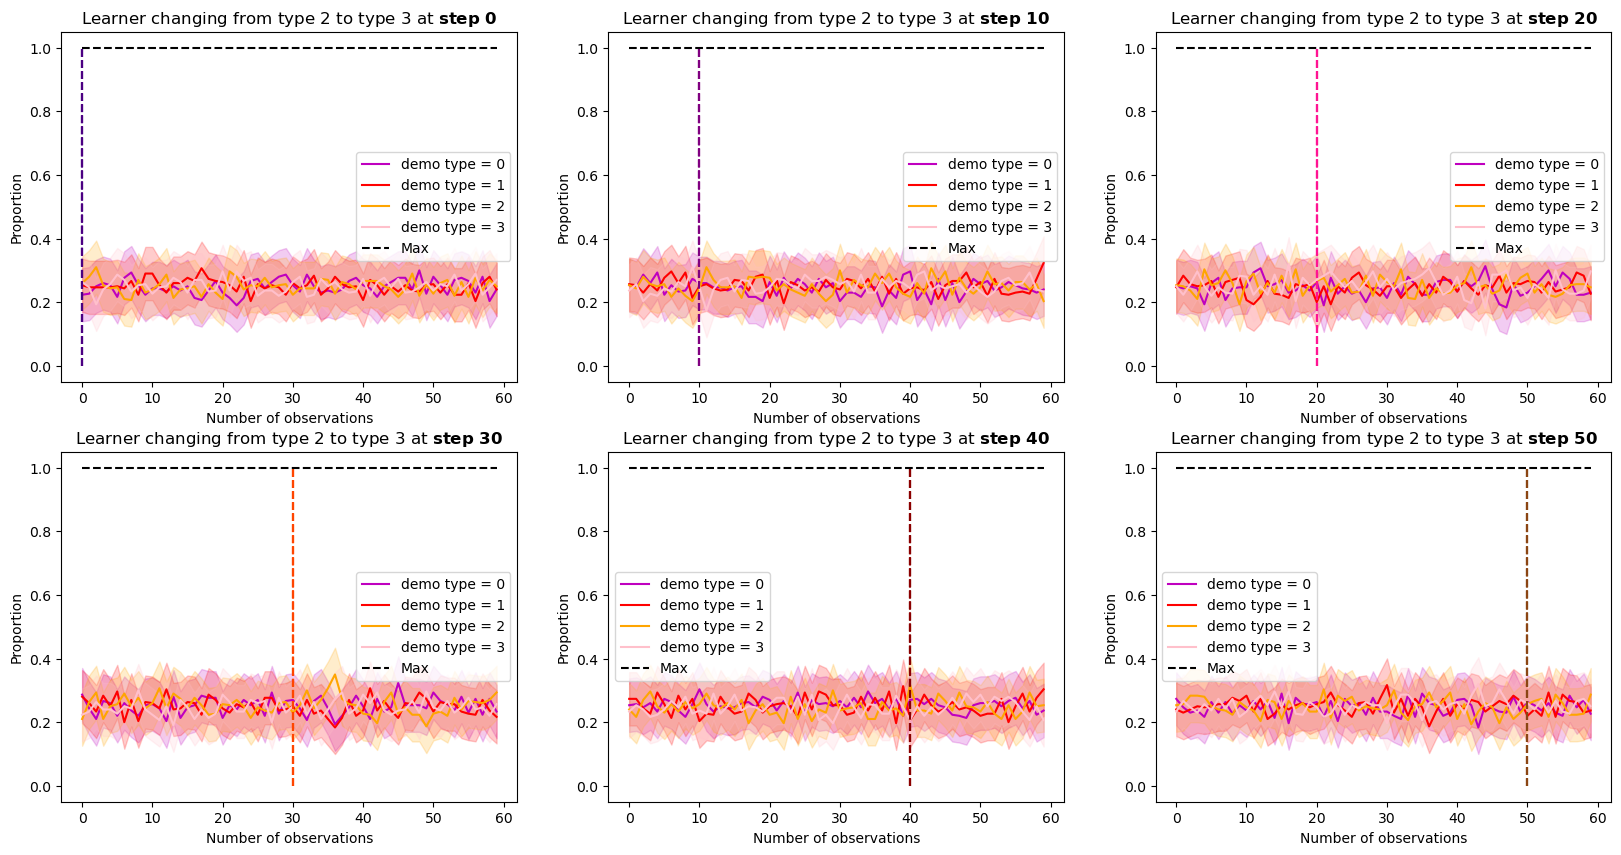

In [263]:
display_tracking('Uniform', init_type=2, final_type=3)

#### Optimal non adaptive teacher

In [35]:
changing_step_values = [0, 10, 20, 30, 40, 50]
for changin_step in changing_step_values:
    evaluate_tracking(changin_step, 'Opt_non_adaptive', init_type=2, final_type=3)

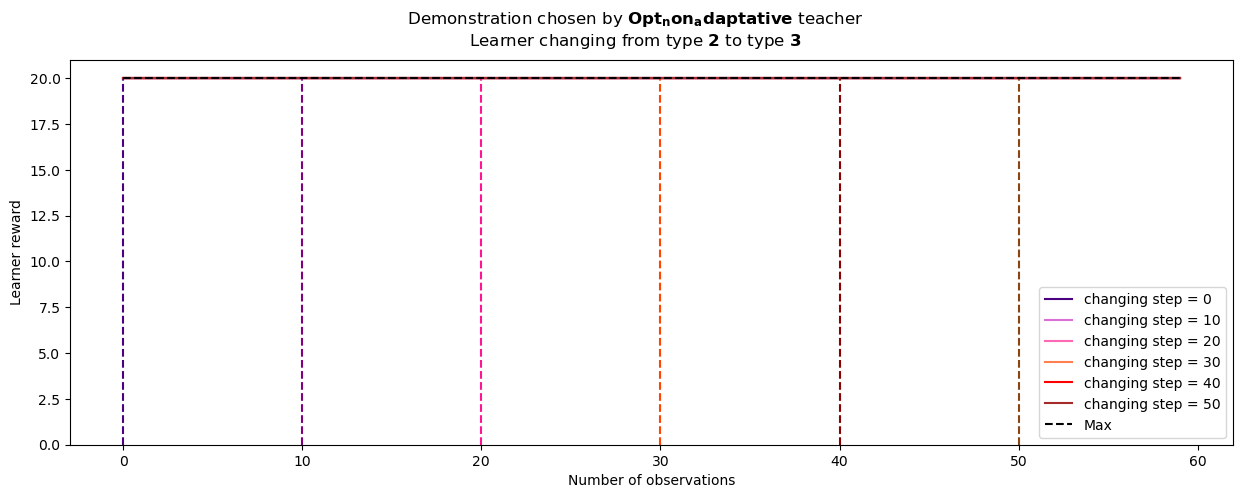

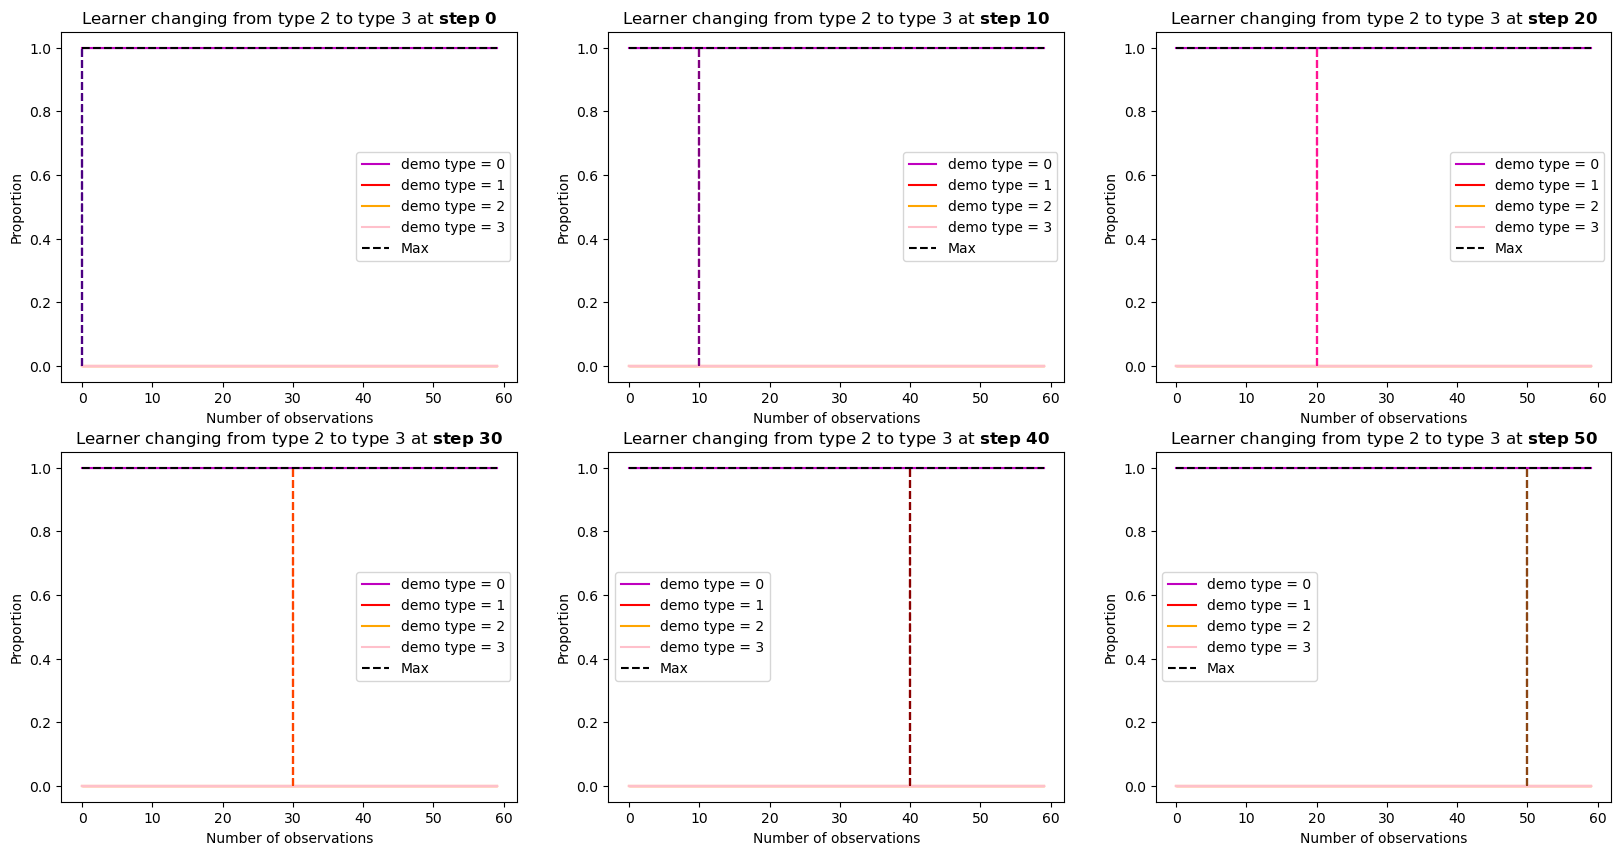

In [14]:
display_tracking('Opt_non_adaptive', init_type=2, final_type=3)

#### Saving

In [37]:
save_output(DICT_tracking, './outputs/bayesian_ToM', 'teacher_eval_change_tracking')

### Unknown learner type

Observation environment


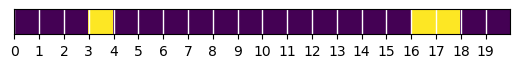

Demonstration environment


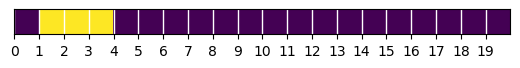

In [12]:
observation_env = ButtonsToy(n_buttons, n_music)
print('Observation environment')
observation_env.render()
plt.show()

demonstration_env = ButtonsToy(n_buttons, n_music)
print('Demonstration environment')
demonstration_env.render()
plt.show()

num_types = 3 # Remove learner of type 3 (and associated demo) from the support of the teacher beliefs
num_demo_types = num_types
unknown_type = 3

In [13]:
# Global evaluation parameters
# DICT_unknown = {}
# LOADED = False
DICT_unknown = load_output('./outputs/bayesian_ToM/teacher_eval_unknown_learner.json')
LOADED = True

N = 100
N_envs = 3
num_obs = 100

n_eval = 20

#### Experiments and display

In [14]:
def evaluate_unknown(method: str, alpha: float) -> None:
    if method not in DICT_unknown.keys():
        DICT_unknown[method] = {}
    DICT_unknown[method][alpha] = {}
    DICT_unknown[method][alpha][unknown_type] = {}
    DICT_unknown[method][alpha][unknown_type]['rewards'] = []
    DICT_unknown[method][alpha][unknown_type]['demo'] = []
    DICT_unknown[method][alpha][unknown_type]['uncertainty'] = []
    DICT_unknown[method][alpha][unknown_type]['teacher_beliefs'] = []
    for _ in range(N_envs):
        # Init envs
        observation_env = ButtonsToy(n_buttons, n_music)
        demonstration_env = ButtonsToy(n_buttons, n_music)
        for _ in range(N):
            cum_rewards = []
            all_demo = []
            uncertainties = []
            teacher_beliefs = []
            for n in range(num_obs):
                # Init teacher
                if method == 'MAP' or method == 'Bayesian':
                    teacher = BaysesianTeacher(env=observation_env,
                                                num_types=num_types)
                elif method == 'Uniform' or method == 'Opt_non_adaptive':
                    teacher = NaiveTeacher(env=observation_env,
                                                num_types=num_types)
                # Init learner
                learner = Learner(unknown_type) # unknown type for the teacher
                learner.init_env(observation_env)
                if method == 'MAP' or method == 'Bayesian':
                    # Observe the learner
                    traj = learner.act(size=n)
                    teacher.observe(traj)
                    # Teacher uncertainty
                    uncertainties.append(Shannon_entropy(teacher.beliefs))
                    teacher_beliefs.append(teacher.beliefs)
                # Chose demonstration
                teacher.init_env(demonstration_env)
                demo = teacher.demonstrate(method=method, alpha=alpha)
                # Show the demonstration
                learner.init_env(demonstration_env)
                learner.observe(demo)
                # Evaluate hwo helpful has been the demonstration
                _, rewards = learner.act(size=n_eval)
                # Append
                cum_rewards.append(np.sum(rewards))
                all_demo.append(len(demo[0]))
            DICT_unknown[method][alpha][unknown_type]['rewards'].append(cum_rewards)
            DICT_unknown[method][alpha][unknown_type]['demo'].append(all_demo)
            DICT_unknown[method][alpha][unknown_type]['uncertainty'].append(uncertainties)
            DICT_unknown[method][alpha][unknown_type]['teacher_beliefs'].append(teacher_beliefs)

In [15]:
def display_evaluation_unknwon(method: str, alpha: float, save: bool=True):
    demo_colors = ['m', 'red', 'orange', 'pink']
    if LOADED:
        alpha = str(alpha)
        unknown_type_str = str(unknown_type)
    else:
        unknown_type_str = unknown_type

    suptitle = f'Evaluation of the {str(method)} teacher on unknwon learner type {unknown_type_str} (with cost parameter alpha={alpha})'
    centered_suptitle = suptitle.center(150)
    print(f"\033[1m" + centered_suptitle + f"\033[0m ")

    fig0 = plt.figure(figsize=(15,5))
    # Learner total reward on trajectory of size 20 (after seen the demo chosen by the teacher (unknown learner type)
    all_evals = np.array(DICT_unknown[method][alpha][unknown_type_str]['rewards'])
    mean = np.mean(all_evals, axis=0)
    std = np.std(all_evals)

    plt.plot(mean, label=f'mean')
    plt.ylim(0, 21)
    plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std / np.sqrt(N * N_envs), alpha=0.2)
    plt.plot(np.arange(num_obs), [20] * num_obs, c='k', label="Max", ls='--')
    
    # Baseline
    if method == 'MAP' or method == 'Bayesian':
        baseline = 'Uniform' if method == 'MAP' else 'Opt_non_adaptive'
        all_evals = np.array(DICT_unknown[baseline][alpha][unknown_type_str]['rewards'])
        mean = np.mean(all_evals, axis=0)
        std = np.std(all_evals)

        plt.plot(mean, label=f'Baseline ({baseline})', color='crimson')
        plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std / np.sqrt(N * N_envs), alpha=0.2, color='crimson')

    plt.title(fr'Learner total reward ' + '\n' + fr'$\mathbf{{{method}}}$ teacher for $\mathbf{{unknwon \quad learner \quad of \quad type \quad {unknown_type_str}}}$' + f'\n cost parameter alpha={alpha} (95% c.i)')

    plt.xlabel('Number of observations')
    plt.ylabel('Learner reward')
    plt.legend()

    fig1 = plt.figure(figsize=(25,5))

    # Teacher uncertainty
    if method == 'MAP' or method == 'Bayesian':
        fig1.add_subplot(1,3,1)
        all_evals = np.array(DICT_unknown[method][alpha][unknown_type_str]['uncertainty'])
        mean = np.mean(all_evals, axis=0)
        std = np.std(all_evals)

        plt.plot(mean)
        plt.ylim(- 0.5 , Shannon_entropy(np.ones(num_types) / num_types) + 0.5)
        plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2)
        plt.plot(np.arange(num_obs), [0] * num_obs, c='k', label="Min", ls='--')
        plt.title(fr'Teacher uncertainty ' + '\n' + fr'$\mathbf{{{method}}}$ teacher (95% c.i)')

        plt.xlabel('Number of observations')
        plt.ylabel('Teacher uncertainty (Shannon entropy)')
        plt.legend()

        fig1.add_subplot(1,3,2)
        # Teacher beliefs (per type of learner)
        for type in range(np.array(DICT_unknown[method][alpha][unknown_type_str]['teacher_beliefs']).shape[-1]):
            all_evals = np.array(DICT_unknown[method][alpha][unknown_type_str]['teacher_beliefs'])[:, :, type] ### TEST WARNING
            mean = np.mean(all_evals, axis=0)
            std = np.std(all_evals, axis=0)

            plt.plot(mean, label=f'type = {type}')
            plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2)
        plt.plot(np.arange(num_obs), [1] * num_obs, c='k', label="Max", ls='--')
        plt.title(fr'Teacher beliefs per type of learner ' + '\n' + fr'$\mathbf{{{method}}}$ teacher (95% c.i)')

        plt.xlabel('Number of observations')
        plt.ylabel('Teacher beliefs')
        plt.legend()

    # Repartition btw type of demonstrations shown
    fig1.add_subplot(1,3,3)
    for demo_type in range(num_demo_types):
        demo_rep = np.array(DICT_unknown[method][alpha][unknown_type_str]['demo'])
        if demo_type == 0:
            prop_demo = np.array(demo_rep == n_buttons)
        else:
            prop_demo = np.array(demo_rep == demo_type)
        mean = np.mean(prop_demo, axis=0)
        std = np.std(prop_demo)

        plt.plot(mean, label=f'demo type = {demo_type}', color=demo_colors[demo_type])
        plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N + N_envs), mean - 1.96 * std/np.sqrt(N + N_envs), alpha=0.2, color=demo_colors[demo_type])
    plt.plot(np.arange(num_obs), [1] * num_obs, c='k', label="Max", ls='--')

    plt.title(f'% of each demo type for learner of unknown $\mathbf{{type}}$ ' + fr'$\mathbf{{{unknown_type_str}}}$' + '\n' + f'{method} teacher, cost parameter alpha={alpha} (95% c.i)')
    plt.xlabel('Number of observations')
    plt.ylabel('Proportion')
    plt.legend()

# Super figure
    figs = [fig0, fig1]
    saving_names = ['reward','chosen_demo']
    if save:
        for ii, fig in enumerate(figs):
            fig.savefig(f'./bayesian_ToM/figures/{method}/eval_with_unknown_learner_{saving_names[ii]}_{method}_{alpha}.png')

#### MAP teacher

In [16]:
method, alpha = 'MAP', 0.01
evaluate_unknown(method, alpha)

                               Evaluation of the MAP teacher on unknwon learner type 3 (with cost parameter alpha=0.01)                                


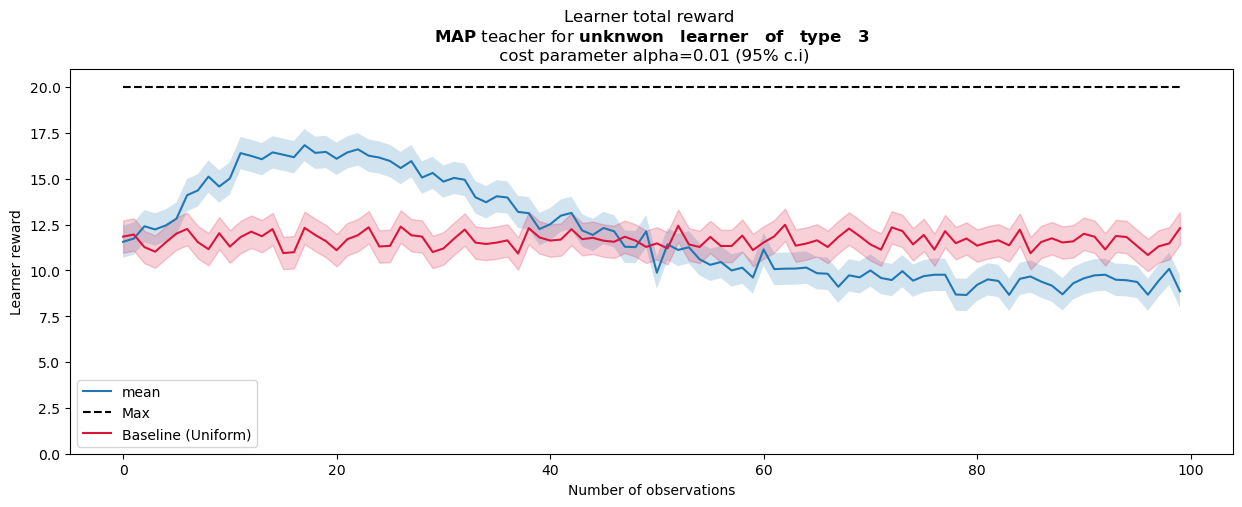

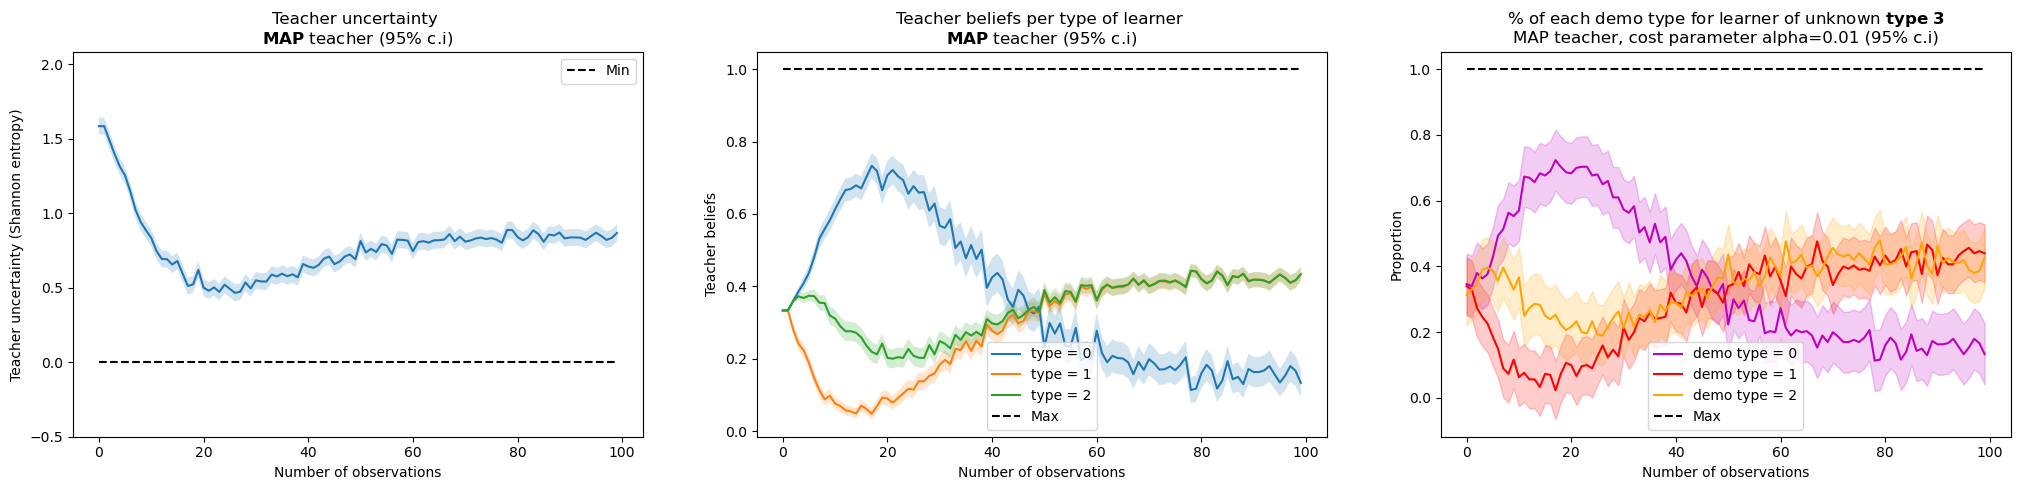

In [17]:
display_evaluation_unknwon('MAP', alpha, save=True)

#### Bayesian teacher

In [27]:
method, alpha = 'Bayesian', 0.01
evaluate_unknown(method, alpha)

                            Evaluation of the Bayesian teacher on unknwon learner type 3 (with cost parameter alpha=0.01)                              


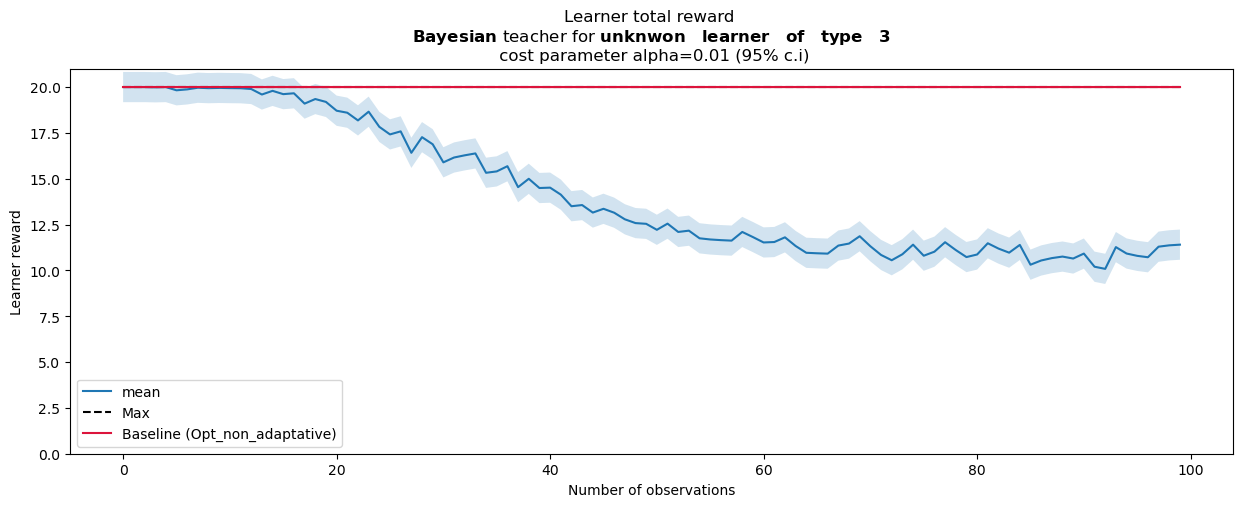

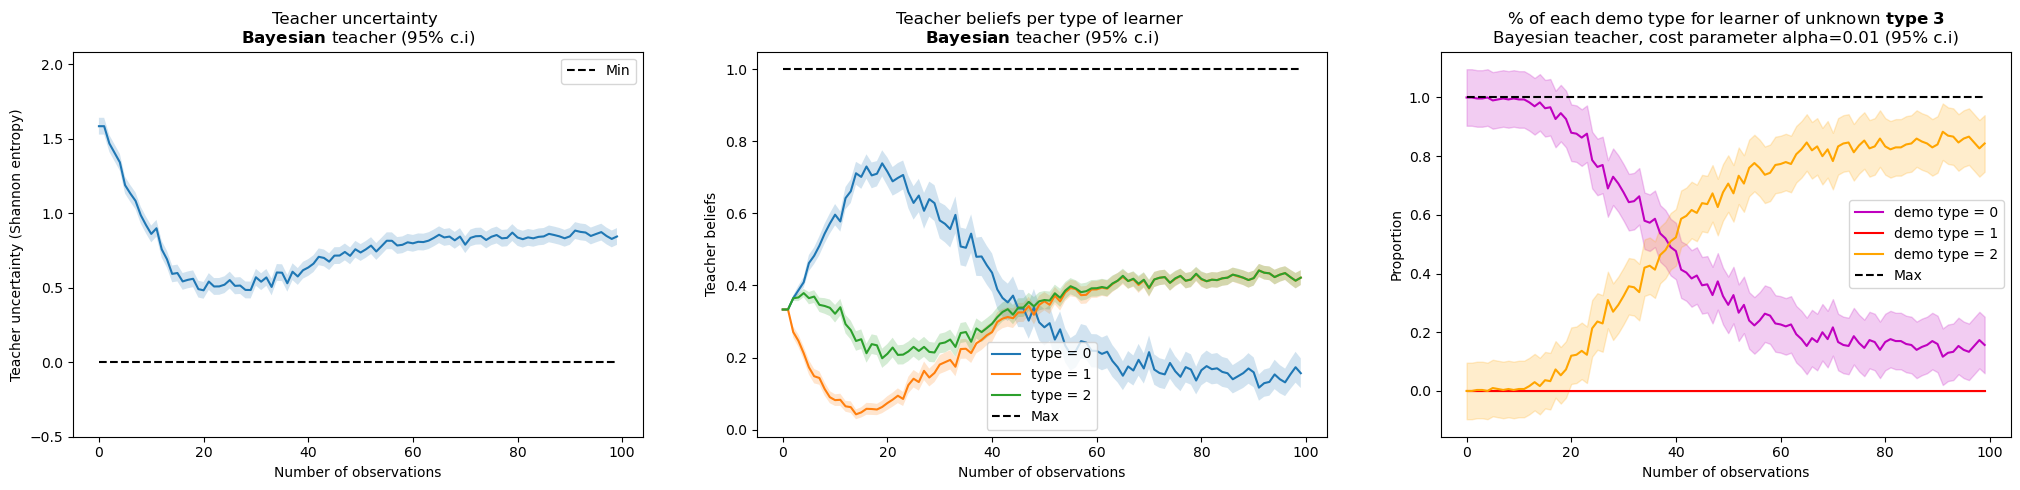

In [18]:
display_evaluation_unknwon('Bayesian', alpha, save=True)

#### Uniform teacher

In [28]:
method, alpha = 'Uniform', 0.01
evaluate_unknown(method, alpha)

#### Optimal non adaptive teacher

In [29]:
method, alpha = 'Opt_non_adaptive', 0.01
evaluate_unknown(method, alpha)

#### Saving

In [31]:
save_output(DICT_unknown, './outputs/bayesian_ToM', 'teacher_eval_unknown_learner')

## ToMNet Teacher

In [68]:
import torch

from neural_network_ToM.dataset import ToMNetDataset
from neural_network_ToM.nn_utils import load_data, load_config
from neural_network_ToM.model import PredNet
from neural_network_ToM.storage import Storage
from torch.utils.data import DataLoader

In [69]:
data_loading_path = './neural_network_ToM/data/small'
config = load_config(os.path.join(data_loading_path, 'config_dataset.json'))

# Dataset parameters
n_buttons, n_music = config['n_buttons'], config['n_music']
num_past, max_steps, min_steps = config['num_past'], config['max_steps'], config['min_steps']
n_agent_train, n_agent_test = config['n_agent_train'], config['n_agent_test']

In [70]:
# Load data
train_data = load_data(os.path.join(data_loading_path, 'train_dataset.pickle')) 
test_data = load_data(os.path.join(data_loading_path, 'test_dataset.pickle'))

In [ ]:
# From generated data
train_store = Storage(n_buttons=config['n_buttons'],
        n_music=config['n_music'],
        max_steps=config['max_steps'],
        num_past=config['num_past'],
        num_types=4,
        num_agents=config['n_agent_train'],
        num_demo_types=4,
        min_steps=config['min_steps']
        )

test_store = Storage(n_buttons=config['n_buttons'],
        n_music=config['n_music'],
        max_steps=config['max_steps'],
        num_past=config['num_past'],
        num_types=4,
        num_agents=config['n_agent_test'],
        num_demo_types=4,
        min_steps=config['min_steps']
        )

train_data = train_store.extract()
test_data = test_store.extract()

In [71]:
train_dataset = ToMNetDataset(**train_data)
print('Training data {}'.format(len(train_data['target_actions'])))

test_dataset = ToMNetDataset(**test_data)
print('Test data {}'.format(len(test_data['target_actions'])))

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

Training data 160
Test data 160


In [77]:
# Load PreNet model

model_loading_path = './neural_network_ToM/model_weights/prednet_model_small_1.pt'
device = 'cpu'

prednet = PredNet(num_input=2, num_agent=n_agent_train, num_step=max_steps, n_buttons=n_buttons, device=device)
prednet.load_state_dict(torch.load(model_loading_path))

<All keys matched successfully>

In [78]:
# Eval on training set
train_dict = prednet.evaluate(train_loader)
# Eval on test set
test_dict = prednet.evaluate(test_loader)

100%|██████████| 160/160 [00:03<00:00, 49.34it/s]


In [79]:
train_msg ='Eval on train| Loss | {:.4f} | Acc | {:.4f} |'.format(train_dict['loss'], train_dict['accuracy'])
print(train_msg)

test_msg ='Eval on test| Loss | {:.4f} | Acc | {:.4f} |'.format(test_dict['loss'], test_dict['accuracy'])
print(test_msg)

Eval on train| Loss | 0.0006 | Acc | 1.0000 |
Eval on test| Loss | 20.6084 | Acc | 0.0625 |


In [80]:
past_traj, current_traj, demo, target_action = train_dataset[100]

In [81]:
def display_traj(traj):
    l = []
    for step in traj:
        a = np.where(step[:, 0] == 1)[0][0] if not np.all(step[:, 0]==0) else 0
        print(f'({a},{int(step[0, 1])})', end='')

In [82]:
for nn in range(num_past):
    print(f'Past traj {nn}:', end='')
    display_traj(past_traj[nn])
    print()

Past traj 0:(12,0)(17,0)(2,0)(0,0)(14,0)(14,0)(0,0)(14,0)(18,0)(16,0)(7,0)(6,0)(10,0)(2,0)(14,0)(19,0)(10,0)(8,0)(19,0)(16,0)(5,0)(0,0)(0,0)(6,0)(7,0)(1,0)(14,0)(19,0)(6,0)(6,0)
Past traj 1:(4,0)(4,0)(3,1)(16,0)(5,0)(18,0)(6,0)(4,0)(13,0)(2,0)(7,0)(13,0)(1,1)(1,1)(1,1)(1,1)(1,1)(3,1)(1,1)(1,1)(3,1)(3,1)(3,1)(1,1)(1,1)(1,1)(3,1)(3,1)(3,1)(3,1)
Past traj 2:(18,0)(17,0)(12,0)(13,0)(12,0)(15,1)(7,0)(17,0)(19,0)(14,0)(7,0)(2,0)(15,1)(17,0)(15,1)(19,0)(6,0)(16,0)(5,0)(0,0)(5,0)(4,0)(11,0)(19,0)(6,0)(11,0)(8,0)(2,0)(11,0)(8,0)
Past traj 3:(14,0)(12,1)(17,0)(9,0)(3,1)(12,1)(3,1)(3,1)(3,1)(12,1)(3,1)(3,1)(12,1)(12,1)(12,1)(12,1)(12,1)(12,1)(3,1)(3,1)(3,1)(12,1)(3,1)(3,1)(3,1)(12,1)(3,1)(12,1)(12,1)(3,1)
Past traj 4:(18,0)(17,0)(18,0)(8,0)(5,1)(8,0)(6,0)(7,0)(14,1)(14,1)(5,1)(14,1)(5,1)(5,1)(5,1)(14,1)(5,1)(14,1)(5,1)(5,1)(14,1)(14,1)(14,1)(5,1)(5,1)(5,1)(5,1)(5,1)(5,1)(14,1)
Past traj 5:(3,1)(8,0)(4,0)(14,0)(0,0)(8,0)(16,1)(16,1)(16,1)(16,1)(3,1)(16,1)(16,1)(3,1)(3,1)(16,1)(16,1)(3,1)(3,1)(16,1

In [83]:
print('Current traj: ', end='')
display_traj(current_traj)

Current traj: (2,0)(19,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)

In [84]:
print('Demo: ', end='')
display_traj(demo)

Demo: (0,0)(1,0)(2,0)(3,0)(4,0)(5,1)(6,0)(7,0)(8,0)(9,0)(10,0)(11,0)(12,0)(13,1)(14,0)(15,0)(16,0)(17,1)(18,0)(19,0)

In [85]:
past_traj_tensor = torch.from_numpy(past_traj[None,...])
current_traj_tensor = torch.from_numpy(current_traj[None,...])
demo_tensor = torch.from_numpy(demo[None,...])

pred_action, e_char, e_mental, e_demo = prednet(past_traj_tensor, current_traj_tensor, demo_tensor)

In [86]:
a = np.exp((pred_action).detach().numpy())
a /= a.sum()

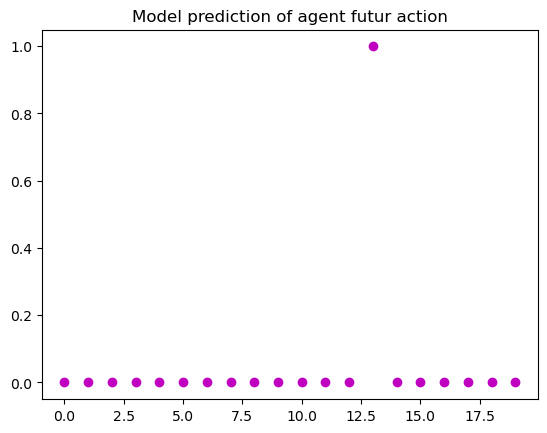

In [87]:
plt.scatter(np.arange(20), a, c='m')
plt.title('Model prediction of agent futur action');

In [88]:
print('true', int(target_action), 'pred', np.argmax((pred_action).detach().numpy()))

true 13 pred 13
